# The final goal is to make a predictive model to predict news category ie which type of new is their input is Text.

# 0. Library pkg 

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PreProcessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn import preprocessing

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from tensorflow.keras.preprocessing.text import one_hot # 1 hot encode using keras

# Tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,Activation, LSTM
from tensorflow.keras import utils as np_utils

In [2]:
df = pd.read_csv(r'E:/DS/ML/Text_data.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## a) How many number of unique News Categories ? 

In [3]:
df['category'].value_counts()

sport            236
business         235
politics         180
tech             176
entertainment    172
Name: category, dtype: int64

##  Check missing values in data 

In [4]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [5]:
# Info of data Catego coln
info = df.groupby('category')['text'].count()
info.describe()

count      5.000000
mean     199.800000
std       32.713911
min      172.000000
25%      176.000000
50%      180.000000
75%      235.000000
max      236.000000
Name: text, dtype: float64

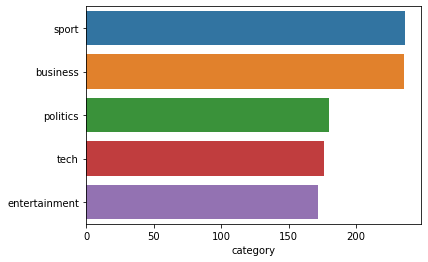

In [6]:
# Top News Category
sns.barplot(y=df['category'].value_counts().index, x=df['category'].value_counts(),orient='h'); #Index will give name label
#ax.set_xlabel('Category', fontsize=14)
#ax.set_ylabel('Total News', fontsize=14)
#ax.set_title('Category vs Total News', fontsize=14);

### From above we see that Business, Sport news are the Top 1. 

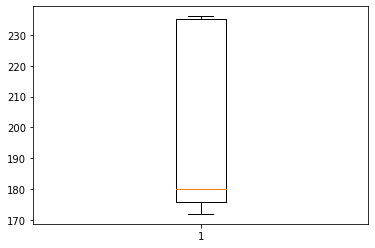

In [7]:
plt.boxplot(df.groupby('category')['text'].count() );

### Their is no outlier in data . 

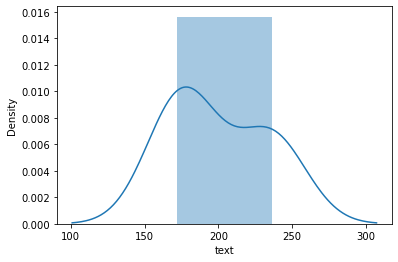

In [8]:
# Distribution of Data
sns.distplot(df.groupby('category')['text'].count() );

# 1. Nlp Pre-Processing 

In [9]:
corpus = []
for i in range(0,999):
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english')) ]
    text = ' '.join(text)
    print(text)

    corpus.append(text)

tv futur hand viewer home theatr system plasma high definit tv digit video record move live room way peopl watch tv radic differ five year time accord expert panel gather annual consum electron show la vega discuss new technolog impact one favourit pastim us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devic one talk technolog ce digit person video record dvr pvr set top box like us tivo uk sky system allow peopl record store play paus forward wind tv programm want essenti technolog allow much personalis tv also built high definit tv set big busi japan us slower take europ lack high definit program peopl forward wind advert also forget abid network channel schedul put togeth la cart entertain us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channel although us lead technolog moment also concern rais europ particularli grow uptak servic like sky happen to

wilkinson fit face edinburgh england captain jonni wilkinson make long await return injuri edinburgh saturday wilkinson play sinc injur bicep octob took part full contact train newcastl falcon wednesday year old fli half start saturday heineken cup match murrayfield bench newcastl director rugbi rob andrew said fine hope get game stage year old miss england autumn intern aggrav haematoma upper right arm saracen subsequ replac england captain full back jason robinson sale charli hodgson took number shirt intern canada south africa australia wilkinson year disrupt injuri muscl problem follow eight month sidelin shoulder injuri sustain world cup final
last star war children sixth final star war movi may suitabl young children film maker georg luca said told us tv show minut reveng sith would darkest violent seri think would take five six year old told cb programm air sunday luca predict film would get us rate advis parent scene may unsuit open uk us may said expect film would classifi pg 

connor boost british tenni former world number one jimmi connor plan long term relationship lawn tenni associ help unearth next tim henman american spent three day lta annual elit perform winter camp la manga earlier week britain right attitud said connor involv lta better short term arrang confus kid ask lta chief execut john crowther ad relationship jimmi alreadi start develop coach player said us like want use jimmi number week year hope begin good long term relationship camp play host lead senior junior player includ greg rusedski arvind parmar ann keothavong la manga amaz site take bunch kid want best said connor speak queen club london impress coach way kid went workout feel put everi practic interest see kid desir passion brought coach surround instil import work practic someth buy know given give back effort everi minut practic speak la manga lta perform director david felgat told bbc sport jimmi fantast player coach humbl consid achiev work coach hope grow get individu relatio

mobil audio enter new dimens mobil phone move closer ubiquit one media player audio becom ever import good sound small devic sound buzz bee jump left right disappear around back head surround sound demo unremark heard multi speaker home cinema system startl emerg small mobil phone british firm sonapt one number compani develop audio technolog emerg stereo speaker firm sr offer stereo widen technolog mobil phone sonapt manag director david monteith say firm compani offer posit audio mobil quit basic technolog make sound seem bit bigger headphon bit nicer one realli tri make proper posit audio individu channel move around sonapt work japanes mobil network ntt docomo set standard audio mobil phone last month handset nec fujitsu mitsubishi releas japanes marker chip produc yamaha rohm sonapt technolog technolog around pc game consol time make effici go small consum devic like mobil phone said mr monteith technolog work appli scienc psychoacoust grew medic research done compani research dir

firefox browser take microsoft microsoft internet explor seriou rival long await firefox web browser releas peopl get excit new softwar releas especi program game music movi player releas first full version firefox manag drum respect amount pre launch fervour fan softwar band togeth rais cash pay advert new york time announc version browser avail releas firefox novemb might even caus head turn microsoft program steadili win peopl away softwar giant internet explor browser firefox creat mozilla foundat start former browser maker netscap back much develop work done sinc gone firefox made first appear name februari earlier incarn core technolog call phoenix firebird sinc softwar gain prais convert least larg number secur problem come light microsoft internet explor rival ie got boost late june two us comput secur organis warn peopl avoid microsoft program avoid fall victim seriou vulner internet monitor firm websidestori chart grow popul peopl use firefox browser say respons slowli erod s

labour target hardcor truant fresh crackdown persist truant england launch educ secretari ruth kelli serial truant make one pupil previou initi brought pupil back school sinc accord offici statist parent contract penalti notic fast track prosecut system use tackl stubborn problem thought nearli half million children skip school day tori say labour previou success regard issu came tackl easi part problem reduc authoris absenc parent permit take children school absenc often due famili holiday howev serial truant avoid classroom despit govern scheme cost miss class like becom involv crime well fail academ measur parent contract penalti notic adopt local educ author last term come forc remaind term one local educ author alon parent warn would receiv penalti notic unless child attend improv tough stanc paid issu attend improv case truanci reduc worst hit school govern behaviour improv programm equival pupil back class sinc septemb new measur come top nation truanci sweep sixth take place mo

campaign cold call question labour conserv still telephon million peopl sign make sure get market cold call parti say stick rule ensur call market instanc ask peopl vote intent lib dem ask watchdog overse rule stop call inform commission offic say survey allow peopl told person data kept telephon call centr expect use never three major parti run gener elect seven million telephon number telephon prefer servic tp list ban unsolicit sale market call scheme run direct market associ back eu direct privaci electron commun rule market call appli much politician privat sector compani mean labour tori call peopl sign tp labour parti spokesman told bbc news websit parti avoid tp list telephon peopl membership fundrais happen voter identif call ask parti vote market clear legal advic said cover telephon prefer servic said parti alway ask peopl would happi contact said rung conserv spokeswoman said parti stuck rule rang tp subscrib said appli tp line law would thing allow law assist inform commis

ukrain trim privatis check ukrain review dozen state asset sale countri new administr tackl corrupt figur announc presid viktor yushchenko less case mention last week cover mani biggest deal ukrain recent oust long serv leader leonid kuchma said want closer european union link separ statement eu said us back ukrain entri world trade organis comment came viktor yushchenko prepar head brussel meet us presid georg w bush north atlant treati organis nato leader non nato member leader invit attend summit mr yushchenko recent defeat moscow back presidenti candid prime minist viktor yanukovych poll made secret wish fight corrupt make ukrain transpar earlier month new prime minist yulia tymoshenko said mani firm may privatis put spotlight comment rais concern among number investor mr yushchenko seen monday tri sooth fray nerv acknowledg busi ukrain shape privatis carri accord law mr yushchenko said monday trust busi want defend law continu ad review would focu dozen compani hundr thousand cite

robinson want dual code success england rugbi union captain jason robinson target dual code success australia saturday robinson former rugbi leagu intern switch code lead england australia twickenham gmt gmt great britain rugbi leagu team take australia final tri nation tournament beat aussi game would massiv achiev especi leagu said robinson england chanc seal third autumn intern victori success win canada south africa well gain reveng june hammer wallabi meanwhil great britain could end year failur australia victori elland road britain individu test match fail secur silverwar win ash seri victori sinc great opportun land trophi would massiv boost rugbi leagu countri said robinson know boy defeat aussi alreadi tri nation robinson lose sight task face england side final autumn intern us play two two novemb said beat australia would end great autumn seri england stumbl look back regret robinson also reveal union side sent great britain team good luck messag ahead showdown leed sign card

wale must learn health lesson new health minist wale say lesson learn england tackl wait list dr brian gibbon first full day job jane hutt sack admit big challeng insist essenti place plaid cymru liber democrat said dr gibbon need chang polici meanwhil ms hutt defend record say wait time list health agenda dr gibbon gp blaengwynfi upper afan valley becom aberavon said nh staff want period consolid tremend chang reform one biggest problem face ms hutt five half year assembl first health minist length wait list wale novemb british medic associ said nh staff weep despair figur show peopl wait treatment wale previou month month list england lowest year peopl wait treatment dr gibbon told radio wale doubt manag wait list england done lot use work need learn said nh wale also need creat healthier popul rather respond ill health balanc view prioriti import need consist across board approach recognis patient experi use servic go end day main test servic work said nh staff want period consolid 

hodgson relish european clash former blackburn boss roy hodgson say premiership follow rest europ winter break insist gruell domest schedul damag english elit bid champion leagu glori hodgson charg vike stavang liverpool clash bayer leverkusen anfield tuesday member uefa technic committe hodgson fierc advoc winter break employ throughout europ although england champion leagu contend plough heavi fixtur list hodgson told bbc sport believ premiership embrac idea expect cost english repres last champion leagu feel difficult say certainti team break definit edg fervent support break give player chanc recharg batteri midway season suggest give team advantag champion leagu school thought suggest break come back put disadvantag bigger discuss around winter break natur footbal today need footbal player way premiership develop rather one two match champion leagu februari hodgson believ winter break carri mani advantag explain said perfect chanc recharg batteri certainli still manag england woul

amnesti chief lament war failur lack public outrag war terror power indict failur human right group amnesti intern chief said lectur london school econom iren khan said human right flout name secur sinc septemb said human right movement use simpler languag prevent sceptic spread moral messag fight poverti focu polit right elit ms khan highlight detent without trial includ us camp guantanamo bay cuba abus prison evid increas human right problem new challeng way age old debat secur human right translat languag war said use languag war human right sidelin know human right appli time war ms khan said breach infecti seen almost major countri world human right movement face crisi faith valu human right said accompani crisi govern unit nation system seem abl hold countri account amnesti secretari gener said grow gap perceiv influenc human right group could actual achiev fuell sceptic public passiv war terror singl power indict failur human right group said ms khan said movement fail mobilis p

target better mani econom target set lisbon summit european union leader meant help europ leapfrog way past unit state becom world lead economi lisbon target much econom prestig mani economist analyst ensur europ becom global econom laggard also ensur europ continu compet equal grow econom giant asia india china well econom might unit state tone urgenc report wednesday former dutch prime minist wim kok mr kok commiss european commiss march year assess far eu come toward meet lisbon target five year incept conclus simpl mani target serious miss lisbon risk becom synonym miss object fail promis report said statu quo option risk medium long run noth less sustain societi europ built said report come time europ competit posit wane eu econom growth rate project year next growth overal employ rate europ product lag behind us meet lisbon target requir polit commit eu member state volunt far part due state global economi past year mr kok report note ink scarc dri lisbon agreement worldwid stock

hong kong world cup bid hong kong hope join japan co host rugbi world cup japan appli host tournament aim take outsid rugbi tradit stronghold first time hong kong rugbi footbal union hkrfu chairman john molloy call territori host one pool quarter final japanes rugbi footbal union jrfu say yet receiv formal present hkrfu stage consid host event said jrfu secretari koji tokumasu cannot examin propos unless get definit form japan face stiff competit form south africa new zealand host event seven year time world cup held countri six nation tri nation said tokumasu think irb think time rugbi go global japan readi host tournament look forward welcom world rugbi japan tokumasu ad footbal world cup co host japan south korea huge success well infrastructur place japan also commerci clout host one sport top competit said last year japan launch first profession rugbi leagu fourth largest number regist player world england south africa franc
web radio take spanish rap global spin radio dial us lik

chelsea deni jame heroic brave defens display led keeper david jame help manchest citi hold leader chelsea quiet open jame deni damien duff jiri jarosik mateja kezman paul bosvelt clear william galla header line robbi fowler score visitor sent header wide chelsea possess second half jame kept frank lampard free kick superbl tip player volley wide citi went game proud record domest team beat chelsea season littl alarm first minut chelsea depriv arjen robben didier drogba injuri struggl pose much threat inde visitor look likeli enliven drab open play letharg pace shaun wright phillip watch england boss sven goran eriksson show customari trickeri burst right area deliv danger ball block john terri chelsea suddenli step gear creat flurri chanc first duff got round ben thatcher blast shot jame parri kezman turn ball wide soon afterward jarosik found space area power head lampard corner goalward jame tip ball chelsea look like premiership leader jame kept kezman fierc drive bosvelt jame comb

us crude price surg us crude price soar fresh four month high us refineri problem propel petrol price time high us light sweet crude futur jump barrel new york close gain track surg us gasolin futur record high gallon jump follow fire western refin compani refineri texa shut petrol product spokesman group unabl say product unit would back run market simpli want go citigroup global market analyst kyle cooper told reuter news agenc ed sillier analyst energi merchant ad gasolin refineri issu texa mean scrambl product us gulf coast elsewher refineri houston close due mechan problem tuesday product bp texa citi refineri taken short time approach spring market becom much sensit problem petrol product dealer anticip rise demand fuel ahead holiday season rise price came despit us govern report show domest suppli fuel oil fuel rise meanwhil oil product cartel opec recent announc unlik cut product level also fail calm fear market oil price roughli higher year ago risen sharpli recent week due co

wale get william fit boost wale hope opensid flanker martyn william could fit saturday rb nation championship open england cardiff william expect miss match disc problem neck make speedi recoveri test next hour pretti optimist get wale team physiotherapist mark davi said frustrat mend made good progress last week william along fellow flanker colin charvi unlik play least month recov foot injuri rule millennium stadium clash william initi thought struggl sign point toward wale coach mike ruddock hand first cap former wale skipper richi pugh cardiff blue flanker william offer consider experi declar fit ruddock might tempt includ back row charvi review wale medic staff next monday davi admit outsid chanc fit face franc wale third championship game februari wale injuri concern pugh fellow neath swansea osprey player sonni parker centr trap nerv neck sonni injuri still issu davi said still pain irrit run rule thumb next coupl day ruddock name start line england game gmt tuesday even wale ta

appl mac mini get warm welcom mac mini welcom appl fan industri expert pc user releas tini low cost machin seen good move appl current small share desktop comput market mac watcher analyst say mac mini go long way help appl appeal mass consum specul mac mini bought ipod owner want easi use administ second home comput bravest move made yet said jonni evan news editor macworld magazin mr evan said combin low cost small size huge number ipod user could make big success thought machin would appeal like appl technolog balk pay high price hardwar deepli afford said plu know get virus associ problem alreadi said pc own friend declar would buy one interest new product launch macworld expo strong websit appl store show struggl cope demand accord respons statist gather netcraft mani visit appl store wake mr job speech suffer lengthi respons time macworld expo site complet overwhelm went offlin think fundament good idea cheap even pc said nick ross deputi lab editor pc pro appl work make thing ea

moya emot davi cup win carlo moya describ spain davi cup victori highlight career beat andi roddick end usa challeng sevil moya made miss spain victori injuri beat roddick give host unassail lead woken mani night dream day said moya energi focus today live today think live spain davi cup titl came two year ago valencia beat australia moya nicknam charli admit davi cup dream bit nervou outset peopl said obsess think better way help reach goal obsess realli incred get win point realli someth spanish captain jordi arres said charli play great game opportun let us lost three time roddick day beat wait year posit spain victori also remark perform rafael nadal beat roddick open singl age year day mallorcan becam youngest player win davi cup great way finish year said nadal afterward us coach patrick mcenro want roddick rest team play tenni clay hone skill surfac think help guy even slow hard court learn mix thing littl bit play littl bit smarter tactic better obvious unrealist say go start p

orang colour clash set court row colour orang could hit court mobil phone giant orang launch action new mobil ventur easyjet founder orang said start proceed easymobil servic trademark infring easymobil use easygroup orang brand founder stelio haji ioannou pledg contest action move come two side fail come agreement six month talk orang claim new low cost mobil servic infring right regard use colour orang could confus custom known pass brand right associ extrem import us orang said statement absenc firm commit easi left choic start action trademark infring pass howev mr haji ioannou plan launch easymobil next month vow fight back say noth afraid court case right use corpor colour becom famou last year easyjet founder also said plan add disclaim easygroup websit ensur custom awar easymobil brand connect orang new servic latest ventur easygroup includ chain internet cafe budget car rental interc bu servic easymobil allow custom go onlin order sim card airtim rent mobil exist handset
goodr

economi strong elect year uk busi set prosper next month could trigger interest rate rise accord report optim highest sinc busi reap benefit continu rise public spend say research bdo stoy hayward bank england expect keep rate hold week could go later year rate like rise anticip gener elect may bdo optim index lead indic gdp growth two quarter ahead edg januari octob rise due part increas public spend increas merger acquisit activ thing blight busi optim year uncertainti associ gener elect bdo said bdo output index predict gdp movement quarter advanc remain januari impli gdp growth second quarter howev output index held back recent interest rate rise sterl strength dollar high oil price group note inflat index risen continu last month climb januari octob last year uk look strong go gener elect busi need prepar jolt ahead bank england react growth inflationari pressur said peter hemington partner bdo stoy hayward growth probabl slow end like see higher interest rate sharp drop demand pr

australia rate four year high australia rais benchmark interest rate highest level four year despit sign slowdown countri economi reserv bank australia lift interest rate first upward move year howev shortli bank made decis new figur show fall econom growth last quarter bank said act curb inflat move criticis analyst rate hike first sinc decemb well flag advanc howev opposit parti analyst said move ill time given data show australian economi grew octob decemb annual basi figur repres declin growth gdp seen juli septemb market expect consum spend remain strong howev bank concern grow inflationari pressur recent month becom increasingli clear remain spare capac labour good market becom rather limit said ian macfarlan governor reserv bank inflat remain within bank target rang howev export declin second half fuell rise countri current account deficit differ valu import compar export record australian dollar bn australian govern said economi remain strong unemploy near year low economi stro

yuko owner sue russia bn major owner embattl russian oil firm yuko su russian govern bn bn kremlin last year seiz sold yuko main product arm yugansk state run oil group rosneft bn offset massiv back tax bill group menatep gibraltar base hold compani control yuko say illeg menatep alreadi ask rosneft repay loan yugansk secur asset russian govern argument sell yuganskneftegaz unit full name yuko owe bn back tax year onward accus firm use web offshor firm avoid tax liabil court sent bailiff freez yuko account seiz yugansk critic say sell assault yuko financ part attempt bring energi industri back state control accord menatep govern action contrari energi charter treati design regul disagr energi invest warn russian govern continu attack yuko personnel sharehold warn buyer yuganskneftegaz would face lifetim litig said tim osborn director group menatep time warn action recov valu loss begin earnest today menatep said valu yuko sharehold gone bn virtual noth sinc result russian govern action

deutsch boers set woo lse boss deutsch boers london stock exchang meet amid talk takeov bid lse rais bn bn last month german exchang tabl penc per share offer lse valu bn pari base euronext owner liff london also said interest bid lse euronext due hold talk lse week report readi rais bn fund bid euronext chief jean francoi theodor schedul meet lse counterpart clara furs friday deutsch boers chief werner seifert meet ms furs thursday third meet two exchang sinc bid approach decemb lse reject deutsch boers propos bn offer decemb say undervalu busi agre leav door open talk find whether significantli improv propos would interest lse sharehold custom meantim euronext combin pari amsterdam lisbon stock exchang also began talk lse statement thursday euronext said offer like sole cash ad assur stage offer made deal either bidder would creat biggest stock market oper europ second biggest world new york stock exchang accord ft latest meet deutsch boers adopt charm offens woo london exchang newsp

french suitor hold lse meet european stock market euronext met london stock exchang lse amid specul may readi launch cash bid euronext chief jean francoi theodor held talk lse boss clara furs day rival deutsch boers put forward bid case german exchang said held construct profession friendli talk lse euronext declin comment talk end friday specul mount german may rais bid bn deutsch boers previous offer bn reject lse euronext rumour facil place fund bn cash bid far howev neither tabl formal bid deal either bidder would creat biggest stock market oper europ second biggest world new york stock exchang specul euronext would use friday meet opportun take advantag grow disquiet deutsch boers plan domin london market union deutsch boers staff frankfurt reportedli express fear job would move london takeov success work council express concern equiti deriv trade could manag london futur reuter news agenc report union sourc say german politician also said angri market oper promis move headquart l

ferguson fear milan cut edg manchest unit manag sir alex ferguson said side task ac milan would made easier absenc andriy shevchenko milan talisman european footbal year miss wednesday champion leagu first leg tie fractur cheekbon loss milan could wors qualiti bring ferguson said much miss think know tomorrow night ferguson said milan front line would still repres formid challeng defend play rui costa play kaka forward bring serginho play jon dahl tomasson said ferguson goalscor talisman ruud van nistelrooy fit scot admit unsur whether start dutchman play three month ruud best striker europ judg whether struggl earli pace long said abil put big shout major decis ferguson though confid young player particularli wayn rooney cristiano ronaldo task opportun win cup year question declar matur see everi week ronaldo rooney return van nistelrooy form roy kean paul schole ryan gigg must fantast chanc view share rooney believ get past milan great chanc soon knew play milan got excit look draw a

lost door frontman movi found historian florida discov year old clip clean cut jim morrison appear promot film univers film show door frontman die age play part young man reject florida state univers morrison seen quizz colleg administr refus happen come parent state univers look ahead seen ask incred clean cut soft spoken said florida state archivist jodi norman know florida state univers period time act norman ad door one influenti band hit includ light fire rider storm morrison notori wild lifestyl accus expos simul sex act miami concert found dead bath pari apart die heart problem aggrav alcohol coron record verdict death natur caus grave citi pere lachais ceremoni becom shrine fan
straw attack china arm move lift european union ban arm export china condemn human right group conserv year embargo impos aftermath china crackdown protest tiananmen squar uk foreign secretari jack straw hold talk beij thursday said eu arm code effect current ban human right watch say eu put commerc abus

world tour top video gamer two uk gamer embark world tour part lucr ever global game tournament aaron foster david treaci right take part tournament offer total prize money cash hand separ competit contin hop contest organis cyberathlet profession leagu part prize pair travel cost paid ensur get differ bout cpl world tour kick mid februari first leg istanbul ten bout tournament play throughout one differ countri stop prize money grab tournament champion leg cpl world tour walk away prize winner grand final get prize purs total pot winner stage tour automat get place next stop world tour stop open keen gamer regist onlin registr first stop open weekend pro player win spot tour destin qualifi event organis cpl partner winner qualifi get seed higher elimin part tournament mr foster mr treaci get chanc attend world tour member uk four king game clan toward end four king stage seri onlin painkil competit reveal uk top player pc game best eight player met face face special elimin event late 

black magic new zealand rugbi play colour black haka black charl john munro discov rugbi london christ colleg return nelson stage new zealand first game nelson town met nelson colleg may town triumph two goal nil instig game would becom nation obsess come domin countri sport passion game appeal kiwi psych quickli spread nativ maori find particular empathi sport warrior etho british team led ae stoddart tour new zealand australia soon maori name joe warbrick english ex pat call thoma eyton decid gather combin new zealand team twenti two maori four pakiha form new zealand nativ team play total match new zealand australia uk integr white maori reflecion enlighten new zealand rugbi societi even british press somewhat mystifi pre match tradit maori war danc haka great symbol new zealand rugbi black kit silver fern breast propos tom ellison first annual meet new zealand rugbi footbal union new zealand play first intern australia kiwi triumph sydney follow year offici british tour team came n

tv show unit angolan famili angolan famili attempt track separ nearli year war succeed thank huge popular tv show meet point becom one tv angola watch programm reunit hundr famili run daili televis also radio everi friday hundr peopl gather luanda independ squar record messag front tv camera hope lost rel see mani rel reunit air begin absolut explos huge huge crowd sergio gera programm chief co ordin told bbc world servic assign programm thing littl calmer slightli less peopl two half year broadcast still lot peopl go media southern african countri twice size franc grip quest mani peopl find rel hundr thousand peopl die angola year civil war final end ten thousand peopl still miss mani heard anyth year angolan famili lost someon idea record independ squar model squar argentin capit bueno ari mother go talk dead miss exchang news one woman victoria lapet found sister remain member famili independ squar live meet point seen sibl year saw threw arm told assign start cri felt happi spent l

brewer profit lose fizz heineken carlsberg two world largest brewer report fall profit beer sale western europ fell flat dutch firm heineken saw annual profit drop warn earn may also slide danish brewer carlsberg suffer fall profit due wane demand increas market cost look russia china provid futur growth western european market larg matur heineken net incom fell euro euro year ago blame weak demand western europ currenc loss warn septemb weaken us dollar cut valu foreign sale would knock euro oper profit despit dip profit heineken sale improv total revenu year bn euro bn euro heineken said plan invest euro aggress high impact market europ us heineken also own amstel murphi stout brand said would also seek cut cost may involv close breweri heineken increas dividend payment euro cent warn continu impact weaker dollar increas market spend may lead drop net profit carlsberg world fifth largest brewer saw annual pre tax profit fall bn danish kroner euro beer sale affect sluggish european ec

swiss cement firm buy spree swiss cement firm holcim bid buy two indian cement firm hold compani countri plan buy associ cement compani acc ambuja cement eastern hold firm ambuja cement india ltd holcim statement said share acc fell investor thought offer underpr decid sell meanwhil uk base firm aggreg industri said agre bn takeov holcim deal aggreg give holcim world second biggest cement maker entri uk market boost presenc us peter tom remain aggreg chief execut said p share offer provid signific valu sharehold markfield leicestershir base compani run quarri uk us also readi mix concret plant asphalt plant pre cast concret factori indian deal go ahead give holcim major presenc world fastest grow market behind china acc india second largest cement maker annual capac million tonn market share holcim look buy acc cheap said kk mittal fund manag escort mutual fund new delhi market impress want substanti chunk pay premium market price share holcim rose thursday follow news takeov
connel re

first look playstat chip detail chip insid soni playstat reveal soni ibm toshiba releas limit data call cell chip abl carri trillion calcul per second chip made sever differ process core work task togeth playstat expect develop expect get prototyp earli next year tune game appear launch three firm work chip sinc detail releas might function joint statement three firm gave hint chip work fuller detail releas februari next year intern solid state circuit confer san francisco three firm claim cell chip time power exist processor put insid power comput server cell consortium expect capabl handl trillion float point oper calcul everi second chip also refin abl handl detail graphic common game data demand film broadband media ibm said would start produc chip earli manufactur plant us first machin line use cell processor comput workstat server work version ps due shown may full launch next gener consol expect start well insid playstat chip also use insid high definit tv power comput futur for

podcast look net money nasa year old boy bedroom coupl gadget lover male femal definit podcast diy radio form download mp audio file done anyon microphon simpl softwar net someth say liken talk audioblog mani complement text base weblog diari like site peopl share thought essenti amateur radio show net demand movement earli stage real peopl say real thing commun say adam curri former mtv vj pie piper podcast one commun peopl creat ipodd small comput program known aggreg collect automat send mp file digit music play devic play wmp format digit music player select podcast like subscrib free show feed new podcast avail automat sent devic connect comput total go kill busi model radio think curri tour madison avenu big brand advertis agenc world say scare death next gener like daughter listen radio msn got ipod mp player got xbox listen radio go reach audienc distribut chang barrier brought everyon part fledgl movement gain momentum peopl start think make busi ian fogg jupit research analys

tough rule rington seller firm flout rule rington mobil extra sold could cut uk phone network rule allow offend cut let consum know exactli get money turn servic first month new rule seen least ten firm suspend clean way work rule brought ensur problem plagu net user spread mobil phone last coupl year rington wallpap screensav lot extra phone becom huge popular fierc competit make difficult firm get ware front consum said jeremi flynn head third parti servic vodafon oper portal go quit heavi market cost problem peopl discov servic said combat mani rington mobil content seller start use new tactic squeez cash custom tactic involv sign peopl subscript give instanc sever rington per week month instead singl track thought get mr flynn said move use subscript happen space week end websit grumbletext co uk start get report custom rack larg bill phone content know sign made us uncomfort servic market transpar said mr flynn peopl know offer subscript servic saw potenti substanti consum harm ad

build giant asbesto payout australian build product group jame hardi agre pay bn victim asbesto relat diseas landmark deal could see thousand peopl suffer lung diseas caus asbesto compani made receiv compens move follow angri protest firm said previou compens fund run money subsequ new south wale state inquiri criticis hardi action septemb inquiri found compani misl public amount money set asid cover asbesto relat liabil spark resign chief execut peter macdonald campaign welcom news preliminari agreement moment day fight victim famili said asbestosi suffer berni banton lead victim associ still long way go get jame hardi chairwoman meredith hellicar said deal provid fund arrang afford sensibl workabl end day deal compens peopl termin ill know exactli mani know exact period fall ill said howev deal still receiv approv hardi sharehold hardi current make revenu us australia biggest supplier asbesto build materi compani set fund compens asbesto victim later admit fund run short money decis 

soar oil hit world economi soar cost oil hit global econom growth although world major economi weather storm price rise accord oecd latest bi annual report oecd cut growth predict world main industrialis region us growth would reach fall next year previou estim oecd said howev pari base econom think tank said believ global economi could still regain momentum forecast japanes growth also scale back year outlook worst member eurozon bloc alreadi sluggish growth forecast slip year oecd said overal report forecast total growth member countri oecd slip next year recov nonetheless good reason believ despit recent oil price turbul world economi regain momentum distant futur said jean philipp coti oecd chief economist price crude higher start record high set late octob dip oil price improv job prospect would improv consum confid spend oecd said oil shock enorm histor standard seen wors seventi oil price rise think shock absorb within next quarter vincent koen senior economist oecd told bbc wor

anti tremor mous stop pc shake special adaptor help peopl hand tremor control comput mous easili develop devic use similar steadi cam technolog found camcord filter shake hand movement peopl hand tremor find hard use convent mice simpl comput task errat movement cursor screen three million briton sort hand tremor condit said uk nation tremor foundat use comput mous well known extrem hard peopl tremor delight hear technolog develop address problem said karen walsh uk nation tremor foundat commonli associ tremor parkinson diseas also caus condit like essenti tremor et tremor often affect older peopl hit age et exampl genet afflict peopl throughout live assist mous adapt ama brainchild ibm research jim levin develop prototyp see uncl parkinson diseas struggl mous control knew must way improv situat million tremor suffer around world includ elderli number elderli comput user increas popul age time need comput access grow said comput user plug devic pc adjust depend sever tremor also abl re

yuko seek court action sale yuko return us court wednesday seek sanction baikal financ group littl known firm bought main asset yuko said sue baikal other involv sale yuganskneftega bn damag yuko us lawyer attempt baikal asset frozen russian govern ignor us court order last week block sale baikal background motiv buy unit still unclear russian newspap claim baikal bought yuganskneftega product unit bn bn roubl bn sunday state provok auction strong link surgutneftega russia fourth biggest oil produc mani observ believ unit produc yuko oil output could ultim fall hand surgutneftega even gazprom state ga firm opt auction russian govern forc sale yuko lucr asset part action enforc bn back tax bill say compani owe yuko us lawyer claim auction illeg firm file bankruptci therefor asset protect us bankruptci law worldwid jurisdict wednesday yuko also seek legal remedi prevent break group believ auction illeg intend pursu legal recours avail us yuko spokesman mike lake told agenc franc press ex

bafta hand movi honour movi star across globe attend year bafta film award ceremoni british star imelda staunton clive owen hope award odeon london leicest squar hollywood star leonardo dicaprio pierc brosnan christian slater richard gere also audienc biggest night uk film hollywood blockbust aviat star dicaprio lead field nomin includ best movi etern sunshin spotless mind find neverland motorcycl diari british film vera drake nomin staunton one favourit land best actress award gritti role backstreet abortionist small budget film arriv ceremoni wear green silk chiffon low cut even dress decor bead love home british soil nice inde told report ask whether nervou best actress nomin said hand noth lot mate go nice even nomine best actress categori includ charliz theron monster ziyi zhang hous fli dagger uk star kate winslet two nod role etern sunshin spotless mind find neverland dicaprio face competit bernal jami foxx jim carrey johnni depp best actor categori crow scream arriv red carpet 

faultless feder equal roger feder nice bloke fantast tenni player ultim sportsman lleyton hewitt shook hand get anoth thrash third mani month australian said best right stat speak titl final three grand slam final victori row go back vienna open era record hewitt time houston show form easili match grand slam win effort outplay twice hewitt along andi roddick marat safin sure promin realist three fight world number two rank accord player even feder swiss star differ leagu right feel littl bit told bbc sport domin top ten player say nice thing beaten domin game right hope continu number one player world also main man promot sport court vote intern tenni writer best ambassador tenni atp tour time everyon everi match first round final follow seri press interview three languag english french swiss german major win extra request oblig interview seen end courtesi importantli good humour guy funni good time guy said genuin happi talk yet anoth tape record see pretti much everi day tour give a

speech take search engin scottish firm look attract web surfer search engin read result call speegl look feel normal search engin ad featur abl read result scottish speech technolog firm cec system launch site novemb expert question whether talk search engin real benefit peopl visual impair edinburgh base firm cec marri speech technolog ever popular internet search abil search becom increasingli crucial surfer baffl huge amount inform avail web accord search engin ask jeev around surfer visit search engin first port call net peopl visit speegl select one three voic read result queri summaris news stori sourc bbc reuter still bit robot make mistak never go complet natur sound voic bad said speegl founder gordon renton system ideal peopl blur vision want search someth background someth els say suitabl total blind peopl although royal nation institut blind rnib look technolog ad juli howel digit polici manag rnib express doubt whether speegl similar site ad anyth blind peopl experi web wh

busi fear sluggish eu economi european leader gather rome friday sign new eu constitut mani compani focus matter much closer home name stay busi lill popular tourist destin briton want tast franc weekend mani tourist look impress grand victorian chambr de commerc stand besid opera hous consid built like town hall mani northern english town wealth creat coal steel textil like northern england industri scotland industri long term declin last coal pit close beck crespel specialist steel firm armentier mile lill compani laid worker sinc specialis make bolt fix power station oil industri mani built europ day director hugu charbonni say pressur factori far east abl make output cheapli key market china india busi market absolut global imagin live size busi even within enlarg european union would need peopl perhap say globalis hurt law franc mean worker paid hour week even though work hour least still steel industri coal total vanish textil struggl new busi attract enough make differ one reaso

consum drive french economi franc econom growth acceler last three month driven consum spend report show gross domest product gdp rose fourth quarter compar previou three month period statist offic inse said expans push annual growth fastest rate two year consum spend fourth quarter also rebound busi invest gave recoveri extra shove analyst warn franc still face challeng unlik keep expand current pace franc still strong econom growth said marc toutai economist natexi banqu populair check figur detail problem consum spend still high french household spent save consum franc sustain high growth rate without improv job market much gap growth employ unemploy level current stuck prove difficult bring despit govern effort anoth worri demand germani itali two franc main trade partner sluggish despit concern analyst point franc outperform major european counterpart economi look robust previou year well strong domest demand export climb fourth quarter biggest increas foreign sale year econom gro

jarr join fairytal celebr french musician jean michel jarr perform concert copenhagen mark bicentenni birth writer han christian andersen denmark hold three day celebr life fairi tale author concert parken stadium april star expect join line come month danish royal famili attend christian andersen fairi tale timeless univers said jarr us age alway beyond pure enjoy tale messag learn year long celebr plan across world celebr andersen work includ emperor new cloth littl mermaid denmark crown princ frederik crown princess mari visit new york monday help promot festiv pair manhattan librari honour us literari critic harold bloom intern icon thought knew well bloom recogn darker aspect andersen authorship princ frederik said bloom formal present han christian andersen award spring anderson hometown odens royal coupl also visit han christian anderson school complex queen mari read ugli duckl young audienc later gala dinner danish supermodel helena christensen name han christian andersen amba

look music drive mobil mobil phone still enjoy boom time sale accord research technolog analyst gartner million mobil sold last year global said report highest total sold date figur surpass even optimist predict gartner said good design look mobil well new servic music download could go way push sale said analyst although peopl still look better replac phone evid accord gartner market see slow replac sale market grew apart japan show replac sale continu western europ mobil analyst carolina milanesi told bbc news websit japan north america western european market coupl year time alreadi tv music rington camera think mobil peopl stop buy replac phone could slight slowdown sale european us market accord gartner peopl wait see come next mobil technolog mean mobil compani think care offer new model peopl see compel reason upgrad said gartner third gener mobil g abil handl larg amount data transfer like video could drive peopl upgrad phone ms milanesi said difficult say quickli would happen 

clijster could play aussi open kim clijster deni report pull januari australian open persist wrist injuri open chief paul mcname said kim wrist obvious go rehabilit spokesman insist simpli delay submit entri doctor assess injuri weekli basi risk could play least risk stay away despit absent wta entri list tournament begin januari clijster would certain get wild card request one clijster still rank nd world despit play hand match last season belgian oper left wrist earli season injur return tour meanwhil jelena dokic use compet australia opt first grand slam season dokic play australian open sinc lost first round year old would reli wild card next season rank tumbl th four time champion monica sele play sinc last year french open anoth absente injur left foot
visa decis everi minut visa process staff sometim expect rule applic everi minut mp said pressur place staff effici rather thorough examin applic public account committe found everi offic annual target applic equival day one everi 

council prepar set tax rise council tax scotland set rise averag come year bbc scotland learn author decid final figur thursday project increas twice rate inflat current financ minist urg council limit increas warn struggl maintain servic unless fund increas say much addit govern money new initi scottish financ minist tom mccabe msp said last week parliament announc addit core expenditur local govern scotland increas sit inflat rate think quit rightli said council year would least ask exercis restraint mr mccabe also look local author becom effici save money come year told bbc radio scotland sunday live programm scotland council individu collect system council tax payrol system human resourc system think opportun rationalis use money save reinvest frontlin servic council umbrella organis cosla provid bbc scotland indic figur next year warn council would face continu struggl maintain servic mr mccabe promis bn next year howev increas target new initi council experi difficulti maintain c

baa support ahead court battl uk airport oper baa reiter support govern aviat expans plan airport throughout countri comment come day ahead high court challeng resid group local council govern white paper judici review centr govern plan expans heathrow stanst luton airport baa oper three said consult local commun consult voluntari compens scheme go beyond statutori oblig baa spokesman said group challeng plan includ stop stanst expans heathrow anti nois campaign hacan clearski london borough hillingdon wandsworth heathrow gatwick edinburgh glasgow airport baa launch seri consult blight properti propos expans septemb close next week compani also offer buy nois hit properti index link unblight price among measur baa set homeown support scheme peopl live near stanst launch special scheme close airport far enough away cover homeown scheme heathrow baa said work close interest parti see strict environment air qualiti nois target third runway met gatwick compani written home busi like affect

emi share hit profit warn share music giant emi sunk firm issu profit warn follow disappoint sale delay two album releas emi said music sale year march fall year profit set lower analyst expect blame poor sale sinc christma delay releas new album coldplay gorillaz gmt monday emi share penc emi said two major album schedul releas end financi year march one coldplay one gorillaz releas date put back emi music sale particularli order januari also lower anticip expect continu februari march compani ad therefor full year constant currenc emi music sale expect lower prior year compani said expect profit alain levi chairman chief execut emi music describ perform disappoint ad remain optimist futur trend industri physic music market show sign stabilis mani part world digit music form continu develop rapid pace said comment delay releas coldplay gorillaz album mr levi said creat market music exact scienc cannot alway coincid report period reschedul recent soft disappoint chang view improv healt

elect deal falter heath role tori fail hold onto power liber demand sir edward heath quit return co oper document releas year reveal fail negoti prime minist follow dramat februari gener elect liber leader jeremi thorp appear will form coalit govern partli collaps conserv leader role prompt queen ask harold wilson form labour govern februari gener elect surpris nation creat hung parliament parti overal control sir edward gone countri fresh mandat amid spiral econom crisi miner strike subsequ three day week labour emerg seat mp short number mr wilson need form major sir edward receiv vote fewer mp believ author remain number provid liber mp would support govern said liber could keep labour three way lend ad hoc support minor govern help draw govern programm three cabinet member coalit conserv accord document releas nation archiv friendli easi first meet indic sir edward mr thorp thought make deal mr thorp high spirit led parti histor jump support also argu grand coalit three main parti 

e univers disgrac wast fail govern scheme offer uk univers cours onlin brand disgrac wast mp e univers scrap last year attract student cost chief execut john beaumont paid bonu despit failur bring privat sector backer common educ select committe call moral indefens govern said e univers project improv understand depart educ skill spokeswoman said ventur ambiti ground break take suffici continu project ad uk e univers organis lost privat sector invest collaps dotcom boom select committe found respons found e univers caught gener atmospher enthusiasm surround internet initi busi plan forecast quarter million student join within decad bring least profit virtual market research carri spent worldwid sale market cours went develop technolog make e univers work use student rest prefer work exist univers websit signific privat investor direct account govern minist e univers much freedom spend public money wish report found committe chairman barri sheerman said uk e univers terribl wast public 

tori tax cut lift spirit michael howard final reveal full scale plan tori tax cut win next gener elect earmark billion use reduc tax although still say pre elect messag mani parti press voter believ warm simplest say vote tori way would govern stick labour spend plan core public servic includ health educ would increas spend defenc polic pension even done would still enough left tax cut equival penni basic rate incom tax money would come billion effici save would see axe taken bureaucraci wast civil servic billion would go spend plan billion fill black hole left claim gordon brown rest go tax cut neither mr howard mr letwin would say exactli would use cash although cut basic rate seem unlik idea alreadi float includ rais tax threshold abolish reduc inherit tax although tori parti urg mr howard announc someth eye catch elect tori leader declar aim exercis open real econom polici divid labour tori elect peopl clear choic mr blair wast tax conserv parti give valu money tax less said move b

tsunami hit sri lanka bank sri lanka bank face hard time follow decemb tsunami disast offici warn sri lanka bank associ said wave kill peopl also wash away huge amount properti secur loan accord estim much loan made privat bank client disast zone written damag state own lender may even wors hit said associ estim privat bank sector bn rupe loan outstand disast zone one hand bank deal death custom along damag destroy collater extend cheap loan rebuild recoveri well give client time repay exist borrow combin mean revenu shortfal slba chairman commerci bank manag director al gooneratn told news confer bank given moratorium collect interest least quarter said public sector one ten state own peopl bank custom south sri lanka affect bank spokesman told reuter estim bank loss bn rupe
lawyer attack anti terror law senior barrist resign protest govern anti terror law say current system give britain bad name ian macdonald qc quit govern fail recognis hous lord rule detain terror suspect indefinit

russian oil merger exclud yuko merger russian ga giant gazprom oil firm rosneft go ahead includ yugansk controversi bought last year merger back russian author allow foreign trade gazprom share gazprom chief alexei miller confirm rosneft own yugansk part deal instead spun agreement state get control share gazprom exchang rosneft state want control gazprom allow foreign trade speak ntv televis control gazprom mr miller ad yugansk swallow rosneft late last year oper separ state own oil firm head current rosneft chief sergei bogdanchikov accord report russian news agenc interfax deal go next two three month obtain major control gazprom begin liberalis market gazprom share mr miller ad open trade gazprom foreign firm becom top emerg market play trader current foreign trade gazprom via small issu london list proxi share posit news intern invest commun global asset manag invest chief david smith said major investor go happi ad howev analyst disappoint yugansk would includ deal yugansk heavi 

eu aim fuel develop aid european union financ minist meet thursday discuss propos includ tax jet fuel boost develop aid poorer nation polici maker ask report develop money rais eu said world richest countri said want increas amount aid give annual gross nation incom airlin react strongli propos fuel levi profit pressur airlin industri low cost firm drive price demand dip septemb terrorist attack outbreak killer sar viru thing pick european us compani teeter brink bankruptci present fuel use airlin enjoy either low tax rate untax eu member state cours applaud humanitarian initi target airlin said ulrich schult strathau secretari gener associ european airlin industri midst fundament crisi confront measur design increas cost continu eu sought allay airlin fear stress thursday meet first step propos also consider ad plan levi tax jet fuel hinder competit airlin sole fund develop tax would implement full consult airlin eu said thought widespread support plan tabl franc germani follow recent

microsoft releas patch microsoft warn pc user updat system latest secur fix flaw window program monthli secur bulletin flag eight critic secur hole could leav pc open attack left unpatch number hole consid critic usual affect window program includ internet explor ie media player instant messag four import fix also releas consid less critic howev updat either automat manual pc user run program could vulner virus malici attack design exploit hole mani flaw could use viru writer take comput remot instal program chang delet see data one critic patch microsoft made avail import one fix ie flaw stephen toulous microsoft secur manag said flaw known although firm seen attack exploit flaw rule often critic flaw announc spate virus follow home user busi leav flaw unpatch patch fix hole media player window messeng msn messeng attack could use take control unprotect machin png file microsoft announc vulner softwar everi month import one class critic latest releas came week compani announc buy secu

bortolami predict dour contest itali skipper marco bortolami believ saturday six nation contest scotland scrappi encount side look first win championship third round game murrayfield bill wooden spoon decid bortolami feel edinburgh contest could end bruis battl pack pretti game team desper gain first win said lock forward itali record three win sinc join six nation two come scotland year itali open stubborn display ireland end lose howev thoroughli outplay impress welsh side rome last time italian travel edinburgh hope claim first away win six nation scotland play extrem well franc pari well ireland came edinburgh said bortolami still disappoint last game wale rome thoroughli determin right wrong nation quest respect team worthi place tournament win game
microsoft take desktop search microsoft enter desktop search fray releas test version tool find document e mail file pc hard drive beta program work pc run window xp window desktop search market becom increasingli crowd firm tout progr

korean lender face liquid creditor south korea top credit card firm said put compani liquid ex parent firm fail back bail lg card creditor given lg group wednesday sign bn rescu packag firm avoid bankruptci thank bn bail januari gave control creditor lg group said packag reflect firm new ownership accept unfair burden least seven million peopl south korea use lg card plastic purchas lg card creditor threaten parent group lg group penalti fail respond demand creditor would seek strong financi sanction lg group lg card liquid said yoo ji chang governor korean develop bank kdb one card firm major creditor lg group said provid help credit card issuer could hurt corpor credibl could spark sharehold lawsuit say want fair reason guidelin split financi burden creditor lg card creditor ask govern mediat avoid risk stabil financi market kdb said analyst believ compromis like lg group know impact consum demand nation economi liquid lg card said kim yungmin equiti strategist dongwon invest trust m

laser help bridg network gap indian telecommun firm turn laser help overcom problem set voic data network countri tata teleservic use laser make link custom offic core network laser bridg work across distanc km set much faster cabl connect month laser help firm set network locat particular geographi get permiss dig ground lay pipe bit task said mr r sridharan vice presid network tata heavi traffic layout ground mean dig uniqu difficult said locat said permiss dig road lay cabl imposs get said far easier secur permiss put network hardwar roof led chennai base tata turn equip use laser make final mile leap tata core network premis custom lightpoint laser bridg work distanc km use rout voic data busi backbon network hardwar work pair beam data air form laser puls laser bridg rout data speed gbp time faster kbp broadband connect tata run hardwar modest speed mbp laser also ideal india climat particularli suitabl rain rate littl low hardli ever foggi said place rain heavi fog common laser l

nasdaq plan share sale owner technolog domin nasdaq stock index plan sell share public list market oper accord registr document file secur exchang commiss nasdaq stock market plan rais sale observ see anoth step closer full public list howev nasdaq icon technolog boom recent pour cold water suggest compani first sold share privat placement technic went public stock start trade otc bulletin board list equiti trade occasion nasdaq make money sale investor bought share privat place file document said nasdaq made share technolog firm compani high growth potenti potent symbol internet telecom boom nose dive bubbl burst recoveri fortun tech giant intel dot com survivor amazon help reviv fortun
labour constitu race row labour choic white candid one uk multi racial seat prove need black short list say race group local councillor lyn brown select west ham east london contest two white five ethnic minor women oper black vote spokesman said want meet labour parti chairman ian mccartney discuss mr

podcast mark rise diy radio appl ipod digit music player hold anyth song lot space fill ipod owner fill space audio content creat unpredict assort produc call podcast strongest propon former mtv host vj video jockey adam curri podcast take name appl ipod although need ipod creat one listen podcast podcast basic internet base radio show podcast creat usual comfort home need microphon pc edit softwar upload show internet other download listen free use technolog base xml comput code rss realli simpl syndic listen subscrib podcast collect automat bit softwar mr curri pioneer latest mp file show pick music play devic automat mr curri record host edit produc daili minut podcast call daili sourc code want make podcast next big thing say extens childhood love radio gadgetri alway technolog wire explain parent gave radio shack project kit allow build transmitt subsequ fm transmitt mom drive around block see far would reach car radio mr curri american grew netherland host illeg pirat radio show 

metlif buy citigroup insur us bank giant citigroup sold travel life annuiti insur arm metlif bn bn sale move citigroup away strategi offer everi financi servic insur broke bank profit growth insur market match expans citigroup busi metlif us lead insur compani purchas give access much larger distribut network robert benmosch metlif chairman chief execut said great opportun brand metlif distribut citigroup agreement metlif abl sell product citigroup next year deal includ smith barney retail brokerag citibank branch compani pay bn bn metlif stock rest made cash travel sale bn made profit total net asset bn deal employ metlif excess capit potenti higher return busi give distribut said stuart quint analyst gartmor
philippoussi doubt open bid mark philippoussi almost certain miss australian open suffer groin injuri hopman cup loss netherland year old suffer two tear adductor muscl unabl play decid mix doubl unlik fit time australian open begin januari melbourn strengthen enough cope repetit

parri put gerrard money listen full interview sport five bbc sport websit gmt parri speak exclus bbc sport also admit gerrard constantli link chelsea final say futur told bbc five live steven money futur liverpool matter accept offer also realist enough know keep steven subject liverpool financ parri also reveal club readi explor possibl sponsorship deal propos new stadium respond critic bbc sport pundit former liverpool stalwart alan hansen insist talk new invest ongo ad door close sharehold lifelong fan steve morgan parri join liverpool chief execut juli similar role premier leagu sever high low time charg anfield busi summer overse arriv new manag rafael benitez manag hold steven gerrard subject liverpool captain prize asset parri reveal real madrid ask option england midfield man negoti striker fernando morient said look way say got deal fernando morient respons real madrid steven sale ask gerrard would liverpool player first day next season parri said sincer hope steven know view 

new foot mouth action urg senior tori mp criticis agricultur depart defra lackadais approach plan futur foot mouth outbreak public account committe chairman edward leigh give reaction report govern watchdog lesson learnt crisi nation audit offic said defra improv capac deal futur livestock diseas outbreak mr leigh said depart drag heel comment refer set scheme share futur compens cost industri also said defra dread slow pay bill date foot mouth crisi outbreak began led slaughter million anim devast mani farm rural busi estim cost uk bn four year outbreak defra yet begin plan review contractor cost invoic remain unpaid mr leigh said mr leigh also point introduct system help control futur outbreak delay novemb emerg european commiss compens amount third money uk govern hope get reimburs billion lost foot mouth crisi minist hope get european union vet fund help anim slaughter cost end grant uk valu cull anim two three time commiss assess like market valu nation audit offic chief sir john 

mix reaction man utd offer share manchest unit noon monday follow new offer malcolm glazer board man utd expect meet earli week discuss latest propos us tycoon valu club bn manchest unit reveal sunday receiv detail propos mr glazer senior sourc club told bbc time differ board oblig consid deal man utd support club urg club reject new deal manchest unit past present footbal eric cantona ole gunnar solskjaer club manag sir alex ferguson lent back support group sharehold unit spoken bid spokesman support club said see differ compar mr glazer previou propos less debt bring money club use money buy mr glazer latest move led mr glazer two son avi joel accord financi time propos receiv david gill unit chief execut end last week pitch p share david cum head uk equiti standard life invest said believ well fund p share bid would enough mr glazer take control club think anyth manchest unit fan told bbc complain curtain may want go get us tycoon woo club last month approach unit board detail propo

new york rocker top talent poll new york electro rock group braveri come top bbc news websit sound poll find music scene promis new act braveri compar cure new order heavili tip act survey imparti critic broadcast rock band kean sound us rapper cent top sound new artist year list includ london indi group bloc parti second uk rapper kano third braveri play first gig sinc support band includ libertin interpol echo bunnymen subject record compani bid war debut singl uncondit caus huge buzz releas uk novemb singer sam endicott said felt great come top sound list anyon say want zillion scream fan jackass liar said one expert tip braveri time music critic paul connolli said spiki love pop chri hawkin host bbc music chart show said band great guitar masteri electro clash sound braveri proof alon new york citi still home hot new talent said nigel hard head music london rock radio station xfm said everi track live set sound like potenti singl uncondit reach summit station listen chart within fo

g back africa debt relief plan g financ minist back plan write debt world poorest countri uk chancellor gordon brown said london meet world seven richest nation would rememb debt relief summit countri could benefit case case review bodi includ world bank imf said us say cannot support mr brown intern financ facil boost aid develop countri bbc correspond said meet produc movement toward uk ambit much work need mr brown said major breakthrough intern organis offer multilater debt relief vast bulk money owe poorest countri could begin final stage process debt owe poorest countri built year debt simpli unpay real world final taken care said ad richest countri hear voic poor said would insist govern reform need transpar tackl corrupt open poorest richest nation bbc correspond patrick bartlett said agreement principl organis involv look would work practic oxfam senior polici advis max lawson welcom statement said g minist pass first hurdl ad need move quickli turn propos real chang world poo

galla see two hors race chelsea william galla believ battl arsen premiership come month two hors race way end season go give everyth told bbc sport need good need lot luck need bit hard arsen player chelsea boy know got power hand ad galla never know go happen footbal two season ago manchest unit pick mani point toward end season titl obvious nobodi chelsea want come second never know happen footbal challeng come first much everi arsen player challeng come first galla given extra confid impact manag jose mourinho sinc take manag summer french intern defend believ mourinho perfectli suit boss squad chelsea star say manageri expertis prevent player revolt normal got team put togeth big name put finish touch finish touch chelsea fantast manag like mourinho said ice cake club fantast knack think everyth anoth incred qualiti mourinho everi player even though fan may consid star within dress room absolut equal mourinho remind everyon creat wonder atmospher everybodi play laugh everi day chan

davenport hit wimbledon world number one lindsay davenport criticis wimbledon issu equal prize money women react disput comment england club chairman tim phillip american said think highli insult prize money taken away somebodi think mr phillip said money flower wimbledon insult england club spokesperson deni phillip made remark insist definit say statement ad said someon els humor asid end radio interview convers move talk wimbledon ground davenport speak follow announc week dubai duti free event join us australian open offer equal prize money women hear women play three set men play five said daveport best women never go beat best men differ game go watch women make better wors hope abl chang peopl mind serena william also dubai ad obvious equal prize money women tenni excit men tenni excit well women right bring spectat abl reap everyon els abl reap
big gun eas san jose top seed american andi roddick andr agassi surviv minor scare reach last eight sap open agassi endur earli problem

royal success shake labour peer withdrawn propos give femal member royal famili right male legisl would end right male heir older sister succeed crown would also torn ancient legisl ban heir throne marri roman cathol govern refus back lord dub success crown bill say complex rais mani constitut issu lord chancellor lord falcon agre act settlement govern success discriminatori ad practic purpos effect limit chang propos lord dub complex controversi undertak rais major constitut issu said lord falcon said member royal famili line success princ wale elig succeed unaffect act simpl matter tinker lightli wish remov form discrimin proper form ad rule chang futur said lord dub privat member bill pass peer would urg mp oppos common lord dub agre withdraw bill second read hous lord urg govern think later stage cannot forev say want chang thing difficult told peer debat labour peer former minist said monarchi symbolis valu countri want situat valu countri move monarchi centuri behind time sure op

newcastl line babayaro newcastl manag graem souness close sign chelsea defend celestin babayaro transfer window reopen souness bid bolster defenc accord report contract negoti advanc stage player babayaro premiership sinc move chelsea anderlecht year old surplu requir season souness would drawn specif individu player said tell chairman work realli hard last coupl month tri deal said day one want strengthen hope come week
labour core support take stock toni blair told labour support back still hungri job prime minist sum mood parti spring confer gateshead elector keener govern labour parti member dri assess graham lane leader labour group newham council problem accord mr lane continu divis iraq foundat hospit tuition fee even voter apathi mr blair new slogan vote blair get brown tell peopl doorstep worri gone soon friend saxon spenc leader devon counti labour group lay blame lack campaign zeal one issu other cannot underestim impact war iraq lost peopl local parti key role two friend fi

itun sell band aid song ipod owner download band aid singl itun appl reach agreement chariti appl unwil rais cost singl line download servic said band aid singl sale p usual cost song itun appl donat p chariti song download copi origin song also avail download p proce go chariti copi new band aid singl sold first day releas monday accord sale figur track becom fastest sell singl year far shift copi rest top combin hmv claim dido robbi william chri martin among featur new version know christma rais money fight hunger africa track sold copi would rais chariti cd sold hmv virgin woolworth donat profit
santi worm make unwelcom visit thousand websit bulletin board defac viru use googl spread across net santi worm first appear decemb within hour success hit websit malici program exploit vulner wide use phpbb softwar santi spread stop googl began block infect site search new victim worm replac chat forum webpag announc site defac malici program soon infect site hit worm start randomli search 

economi strong elect year uk busi set prosper next month could trigger interest rate rise accord report optim highest sinc busi reap benefit continu rise public spend say research bdo stoy hayward bank england expect keep rate hold week could go later year rate like rise anticip gener elect may bdo optim index lead indic gdp growth two quarter ahead edg januari octob rise due part increas public spend increas merger acquisit activ thing blight busi optim year uncertainti associ gener elect bdo said bdo output index predict gdp movement quarter advanc remain januari impli gdp growth second quarter howev output index held back recent interest rate rise sterl strength dollar high oil price group note inflat index risen continu last month climb januari octob last year uk look strong go gener elect busi need prepar jolt ahead bank england react growth inflationari pressur said peter hemington partner bdo stoy hayward growth probabl slow end like see higher interest rate sharp drop demand pr

labour accus broken pledg labour alreadi broken pre elect promis immigr ink dri new pledg card tori claim home secretari charl clark quot tell labour member want migrant come uk tori co chairman liam fox said comment odd toni blair predict net cut immigr mr clark accus tri score cheap polit point muddl immigr asylum london even standard quot mr clark tell labour activist question answer session gateshead want britain offer refug flee tyranni moral duti legal duti someth part essenc countri said want migrat peopl come studi work want peopl come look refug mr blair ask last wednesday govern new immigr plan includ point system econom migrant would reduc net migrat prime minist told mp abus weed result end chain migrat famili automat right settl number probabl fall monday dr fox told report prime minist broken word mani time past promis even last week labour parti elect pledg even incred vagu even last four day tori want quota econom migrant refuge tuesday outlin detail plan health check m

barbarian new zealand new zealand prove strong australian domin barbarian round unbeaten northern hemispher tour easi win rico gear ran two black seven tri predominantli second string line baa baa threaten score tri albert van den bergh xavier rush andrea lo cicero never look like win black aaron mauger good form boot ad point black featur two side start last weekend emphat test victori franc pari baa baa nine wallabi start line new zealand coach graham henri said qualiti perform experienc side number young guy came well learnt older player way thank guy mentor tour run rugbi crowd hope rare materialis marti holah got black onslaught way fifth minut tri rush hit back moment later new zealand went ahead gear made use space vacat temporarili injur chri latham slide nonu found way barbarian defenc give side half time lead host fail ignit second half moment gear score second interv ever go one winner lo cicero sole european barbarian bundl tri briefli curtail deficit match blight controver

saab build cadillac sweden gener motor world largest car maker confirm build new medium size cadillac bl loss make saab factori sweden car unveil geneva motor show intend compet medium size luxuri car market sold us said gm europ presid carl peter forster part effort make us marqu appeal european driver car first cadillac diesel engin gm announc go way allay fear saab factori closur factori trollhaettan centr rumour gm plan sever cutback troubl european oper group new commit swedish factori may welcom group opel worker ruesselsheim germani may face larger proport gm cut neither announc seen unalloy good news sweden sinc reflect saab failur make signific inroad lucr european luxuri car market year saab consist said compet head bmw merced jaguar segment leader agre gm plan build american marqu sweden part effort push altern luxuri brand european driver us long establish upmarket brand even presidenti limousin carri badg yet could prove tough cadillac steal market share major europ luxuri

us actor found gun residu actor robert blake gunshot residu hand cloth night wife shot dead court heard may come shot kill bonni lee bakley mr blake murder trial told criminalist steven dowel mr dowel told lo angel court residu may come mr blake revolv gun collect presenc crime scene polic year old former star us tv drama baretta deni murder mr blake said found ms bakley dead car left restaur said briefli return restaur collect gun left behind discov bodi return gun collect murder weapon could also pick touch leant car found bodi polic box cloth later store box come area offic went fire rang mr dowel also said residu would present mr blake fire gun night wit alreadi told trial mr blake stood quit nervou agit restaur murder actor emmi play maverick detect tv cop drama baretta could face life prison convict
tori urg chang top tori deleg gather expect last confer gener elect declar britain need chang top parti goe spring forum tri highlight see clear choic labour tori co chairman liam fox

heart oak cotonsport heart oak set ghanaian confeder cup final win cameroon cotonsport garoua accra sunday win heart mean play asant kotoko two leg final kumasi team qualifi group saturday group b game cameroon beat south africa douala neither side could qualifi final heart oak start game need win qualifi final cotonsport need avoid defeat go loui agyemang score first two goal heart either side half time ben bortey score third heart look set comfort win cotonsport stage late fight back score twice late first boukar makaji score th minut minut injuri time end game andr nzame iii target littl late cameroonian heart held win game place final first leg final play accra weekend novemb second leg two week later decemb kumasi group b game cameroon sabl bati took lead th minut kemadj santo equalis hour mark thank thokozani xaba bernard ngom put sabl ahead five minut later ernest nfor settl game minut ruben cloet score south african side consol three minut left clock
isinbayeva head birmingham 

footbal manag score big time past decad virtual footbal fan among us becom use annual help championship manag cm inde seem like cm game mani year pc howev last year final time develop sport interact si publish eido would work togeth decid go separ way kept piec franchis si kept game code databas eido retain right cm brand look feel game begin year fan face new situat eido announc next cm game new team develop scratch whilst si develop exist code releas new publish sega name footbal manag mean well footbal manag spiritu successor cm seri releas earlier expect point cm look like ship earli next year given footbal manag larg game everybodi know love new version shape game like fm could blind statist obscen number playabl leagu obscen number manag team realli obscen number player staff around world databas stat faith research compil loyal armi fan justic game realli talk realist satisfi footbal manag game ever grace earth begin pick nation leagu want manag team instanc england scotland giv

branson show flop us screen entrepreneur sir richard branson us tv show rebel billionair prove flop rate programm suffer poor view figur debut fox network three week ago lost one five viewer sinc show seen fox answer apprentic featur tycoon donald trump rate hit rival nbc sir richard show see group young entrepreneur compet becom presid busi empir rebel billionair averag five million viewer st rank prime time show apprentic alreadi complet first season still manag pull million viewer prime time rank number four fox said plan stick branson show throughout episod run go remain air said network spokesman scott grogin creativ extrem pleas show hope audienc find ad contest sir richard show confront busi task solv similar apprentic also subject stunt like walk plank suspend mid air rebel billionair market less materialist version apprentic sir richard shown jump taxi trump seen limousin
wilkinson return unlik jonni wilkinson look set miss whole rb six nation england world cup win fli half sa

sir paul rock super bowl crowd sir paul mccartney wow fan live mini concert american footbal super bowl avoid janet jackson style controversi year old sang hey jude beatl song minut set half time game florida last year jackson expos breast danc routin caus outrag among million tv viewer land cb tv network fine sir paul howev noth raci remov jacket sang organis wide consid play safe year book year old sir paul second super bowl show three year ago invit perform first super bowl septemb attack perform special written song freedom time start show alltel stadium jacksonvil florida beatl number drive car get back perform mellow version live let die jame bond theme record band wing final close show rous version hey jude former beatl resist temptat refer janet jackson headlin grab perform last year instead keep banter song minimum order squeez much music could slot singer remov black jacket halfway show fan hope second nippl gate disappoint kept red sweatshirt underneath earlier black eye pea

probe launch ken nazi jibe investig standard board way follow alleg ken livingston brought offic disreput probe follow london mayor comment jewish journalist compar concentr camp guard parti week ago local govern watchdog also said alleg relat failur respect other power suspend bar labour mr livingston offic complaint made bodi board deputi british jew commiss racial equal speak investig announc bob neill leader london assembl conserv said behav manner unbecom offic shown extraordinarili poor civic leadership administr crisi sunday deputi mayor nicki gavron told bbc polit show believ mayor london would say sorri tuesday offend wider jewish commun prime minist toni blair among call apolog far mayor refus mayor accus oliv finegold even standard newspap doorstep predomin gay event held mp chri smith ms gavron said thought mr livingston comment inappropri believ mayor anti semit said work close ken speak like guard unguard moment way anti jewish moment work hand think remark inappropri bel

search war hit desktop pc anoth front go battl microsoft googl open end microsoft aim launch search softwar find kind file pc hard drive move answer googl releas search tool catalogu data desktop pc desktop search market becom increasingli crowd googl aol yahoo mani smaller firm tout program help peopl find file microsoft made announc forthcom search softwar call financi analyst talk first quarter result john connor microsoft chief financi offic said test version desktop search softwar avail download end year go heck great race search googl microsoft yahoo said go realli fun follow microsoft come late desktop search arena softwar compar favour program larg number rival mani fierc dedic popul user program could base softwar microsoft own result purchas lookout softwar earli octob octob googl releas desktop search softwar catalogu file pc let user use one tool find e mail messag spreadsheet text file present softwar also find webpag messag sent via aol instant messeng mani firm releas de

game enter classroom video game could soon transplant natur habitat academ atmospher classroom violent titl continu top chart game learn alway sat well togeth tide could begin turn recent research london institut educ conclud game valid place classroom game teach life skill decis make problem solv said martin owen futurelab mr owen said game could also help children make quick assess situat learn trial error futurelab non profit organis look way use technolog innov learn game firm busi turn profit lucr commerci market consid develop game use school liverpool base game firm later vision saw gap market learn game somewhat old fashion see anyon els want said dr carl gavin manag director later vision compani set write someth look feel commerci game educ learn element result race academi massiv multiplay car race game requir thirst speed work knowledg physic engin well use futurelab test viabil use game classroom keen find whether alongsid learn game also learn someth rest world understand 

put face big brother liter put face technolog could one key improv interact hi tech gadget imagin surveil system also present virtual embodi person screen react behaviour perhap even alert new e mail basic version call avatar alreadi exist togeth speech voic recognit system could replac keyboard mous near futur idea showcas london scienc museum part futur face exhibit one avatar jeremiah virtual man download free instal comput creator richard bowden lectur centr vision speech signal process univers surrey refer jeremiah rather jeremiah virtual face attempt emul human way respond activ childlik like visual stimulu told bbc news websit see children run laugh wave smile ignor get angri leav get sad also even surpris jeremiah actual intellig work vision react preset way inform provid surveil tracker system abl talk hear least yet surrey team alreadi work jeremiah next version replac human face underwat interact creatur finn fish interest interact provid abil system watch go make decis base

nintendo ds make euro debut nintendo ds handheld game consol offici gone sale europ mani store around uk open midnight let keen gamer get hand devic two screen clamshel gadget cost euro game avail launch featur well known charact super mario rayman ds spearhead nintendo attempt continu domin handheld game market sinc go sale japan us end nintendo sold almost ds consol part popular may due fact ds run catalogu game produc nintendo gameboy advanc handheld game ds expect cost game ds develop well two screen one control touch ds also let player take peopl via wireless download play option mean ds owner take even one own copi particular game ds owner also sent text messag draw nintendo also plan releas media adapt handheld play music video five virgin megastor game shop expect open earli friday morn let peopl buy ds know custom want soon releas mean minut day said robert quinn game uk sale director nintendo sole control europ handheld game market week soon soni expect releas psp consol alth

robot march us cinema summit anim movi robot open top us canada box offic chart take first weekend releas featur voic ewan mcgregor hall berri robin william mel brook robot follow robot inventor move big citi vin diesel famili comedi pacifi fell number two spot take new bruce willi movi hostag open number four howev recut version mel gibson passion christ featur less violenc last year origin movi took despit open cinema new version film receiv littl public origin version avail across us dvd certainli higher expect got said rob schwartz head distribut newmarket film releas passion christ tri get film hope would reach audienc quit reach first time around seem work quit well hope meanwhil smith comedi hitch becom top film global box offic take estim weekend cinema outsid north america accord industri websit screen daili taken far buoy open number one uk last weekend success run germani movi cost report make taken us far
mobil network seek turbo boost third gener mobil g network need get f

asylum children face return uk govern plan return asylum seeker children without parent albania trial scheme could start week may extend appli children countri children chariti react alarm say polici amount forcibl remov may guarante safeti affect home offic say may children best interest reunit commun pilot includ govern five year immigr plan aim return unaccompani asylum seek children albania fail asylum claim sinc least arriv uk seek asylum without famili member children automat becom respons social servic minist held back final remov order unaccompani children legal adult least dozen albanian born teenag thought identifi return accord sourc although public confirm number select could either return famili trace place care albanian author separ negoti establish famili trace return scheme believ underway anoth countri children act public bodi duti act best interest child care laura brownle save children said grave concern least well document traffick children crime prostitut albania c

muslim polic stop like uk muslim accept peopl islam appear like stop search polic home offic minist said hazel blear said innoc muslim would target search islam extremist qualif religi leader enter uk could also made tougher told common inquiri comment describ irrespons outrag islam human right commiss ihrc threat like come peopl associ extrem form islam fals hide behind islam salford mp told common home affair committe mean counter terror power disproportion experienc muslim commun realiti recognis said threat particular place action go target area ad minist religion imam said faith group would ask qualif skill civic knowledg abil engag commun demand last year minist introduc requir minist speak english certain level ihrc chairman massoud shadjareh accus ms blear play islamophobia card run gener elect demonis alien commun said legitimis backlash racist onslaught commun sort comment music ear racist later prime minist offici spokesman urg peopl put ms blear comment context minist say u

doubl win sea insid spanish movi sea insid name best pictur star javier bardem best actor bangkok intern film festiv base true stori paralys man battl end life sea insid best foreign languag film golden globe award annett bene ana geislerova share best actress award bangkok festiv year event scale follow asian tsunami disast fall phantom opera director joel schumach lifetim achiev award hong kong director wong kar wai honour promot asian cinema great honour want share honour thai colleagu wong said french writer christoph barrati korean writer park chan chook share best screenplay award le chorist old boy respect third year bangkok intern film festiv donat profit ticket sale tsunami relief fund
dvd copi protect strengthen dvd harder copi thank new anti piraci measur devis copi protect firm macrovis pirat dvd market enorm current copi protect hack five year ago macrovis say new ripguard technolog thwart current dvd rip copi program use pirat dvd ripguard design reduc dvd rip result supp

kilroy launch verita parti ex bbc chat show host east midland mep robert kilroy silk said want chang face british polit launch new parti mr kilroy silk recent quit uk independ parti said countri stolen us mass immigr told london news confer verita latin truth would avoid old parti lie spin ukip leader roger knapman say glad see back mr kilroy silk mr kilroy silk promis firm fair polici immigr said hope contest seat forthcom gener elect said verita would also announc detail polici crime tax pension health defenc next week announc parti would hold leadership elect thursday due announc constitu run next gener elect come amid specul sight set defenc secretari geoff hoon ashfield seat join new ventur one ukip two london assembl member damien hockney verita deputi leader ukip chairman petrina holdsworth said group parodi parti men left mr kilroy silk announc decis quit ukip public meet hinckley leicestershir last week came month tension vie unsuccess leadership parti said asham member ukip w

davenport put retir hold lindsay davenport put talk retir hold larg injuri free campaign year old world number one said would quit end last year success season chang heart final felt put posit tri win grand slam said davenport would tough walk away feel like contend point hang quit yet davenport three grand slam australian open wimbledon us open career hit seri injuri last year start hit top form seven titl due take part week hopman cup perth decid want rest knee realli want make sure right knee go abl realli withstand rigour whole year come said
buyer snap jet airway share investor snap share jet airway india biggest airlin follow launch much anticip initi public offer ipo ipo million share fulli sold within minut open friday analyst expect jet rais least bn rupe offer interest jet ipo fuell hope robust growth india air travel market share offer repres jet equiti oversubscrib news agenc reuter report jet found london base travel agent naresh goyal plan use cash buy new plane cut debt 

lion blow world cup winner british irish lion coach clive woodward say unlik select player involv next year rb six nation championship world cup winner lawrenc dallaglio neil back martin johnson thought frame next summer tour new zealand think ever say never said woodward would compuls reason pick player avail intern rugbi dallaglio back johnson retir intern rugbi last month continu star club side woodward ad key thing want stress intend use six nation player avail intern rugbi key benchmark job along senior repres make sure pick strongest possibl team play intern rugbi still step test rugbi definit disadvantag think absolut critic histori lion got take player play four countri woodward also reveal race captainci still wide open open book said outstand candid four countri follow black impress display europ recent week includ humili franc woodward believ three test seri new zealand provid ultim rugbi challeng perform particular franc simpli awesom said lion coach certain thing suggest p

tori leader urg harri apolog princ harri person make clear sorri wear nazi uniform friend fanci dress parti say tori leader michael howard mr howard whose grandmoth die auschwitz said mani peopl would offend princ action clarenc hous issu statement say princ apologis realis poor costum number said error made harri apologis matter left palac messag repeat home secretari charl clark said matter left lie lib dem leader charl kennedi said harri privileg posit said apologis person reservoir goodwil princ harri princ william countri think need rememb last forev ad sandhurst would probabl good harri would teach self disciplin former labour mp lord janner high profil member britain jewish commun brand harri action stupid evil told itv time come make public apolog common decenc respect peopl fought nazi famili kill nazi peopl suffer holocaust ad would send armi fast possibl hope would teach behav like photograph princ harri wear swastika armband german desert uniform parti appear thursday sun n

escap prison report order first minist jack mcconnel order report decis allow paranoid schizophren knife attack go visit unguard michael ferguson escap allow high secur carstair unit snp nicola sturgeon demand know respons sign leav scottish execut said minist would notifi would common practic sign approv execut spokesman said health depart state hospit would work togeth prepar report ministeri respons carstair rest rhona brankin deputi health minist ms brankin said first minist call review happen need talk state hospit need reflect ms sturgeon written mr mcconnel ask clarif move allow prison said question must answer escap public reassur safeti polic still search ferguson fail return trip east kilbrid monday scottish nation parti parliamentari leader argu law authoris ferguson leav absenc would come directli minist said scottish execut seem indic yesterday escap mr ferguson matter carstair howev understand mental health legisl decis grant patient restrict patient leav absenc would req

lloyd london head chide fsa head lloyd london insur market criticis britain financi watchdog financi servic author fsa speech monday mr prettejohn urg fsa forc broker disclos size commiss fsa chang chang said mr prettejohn want move disclosur request mandatori disclosur call came speech improv london insur market fsa bide time wait see seiz moment mr prettejohn lloyd chief execut said fsa took regul gener insur sector januari sidestep call requir broker disclos commiss earn insur client last week citi watchdog gave broker insur guidanc manag conflict interest broker must give inform commiss custom request fsa said us lack transpar broker commiss led problem world biggest insur broker marsh mclennan said last week would pay settl charg rais new york attorney gener eliot spitzer octob sought rig bid conjunct insur probe centr around call conting commiss wherebi broker reward accord much busi brought insur arrang alway benefit broker custom insur busi written lloyd market place via broker

fantasi book win hollywood deal british author film right children bestsel snap seven figur sum ridley scott set direct michel paver wolf brother fantasi set year ago first plan seri six book film studio fox bought right around scott compani scott free develop director said thrill project wolf brother enchant book said paver live london previous work lawyer began write book studi biochemistri oxford univers establish author love stori turn work progress children novel publish paver earn advanc highest sum ever paid debut children book wolf brother tell stori torak year old hunter live forest father kill team wolf cub set rid forest evil forc paver current write second book seri michel paver live breath world write said spokesman author told film deal moment write second book mind year away deep primev forest
child access law shake parent refus allow former partner contact children could electron tag plan consid minist curfew commun servic order option could use court order allow parent

vw consid open indian plant volkswagen consid build car factori india said yet make final decis german giant said studi possibl open assembl plant countri remain potenti idea comment came industri minist india andhra pradesh state said team vw offici due visit discuss plan b satyanarayana said expect vw co sign memorandum agreement sever foreign carmak includ hyundai toyota suzuki ford alreadi indian product facil meet demand automobil asia fourth largest economi vw propos plant would set port citi visakhapatnam india eastern coast andhra pradesh offici ad vw alreadi approv factori site measur acr
merritt close indoor mark teenag lashawn merritt ran third fastest indoor time fayettevil invit meet world junior champion clock second finish well clear fellow american bershawn jackson arkansa michael johnson gone quicker set world record sec run sec kenyan bernard lagat miss world record sec ran third quickest indoor mile ever beat canada nate brannen almost sec olymp silver medallist time

minist dig dope row belgian sport minist centr svetlana kuznetsova dope row say apologis make alleg claud eerdeken claim us open champion test posit ephedrin exhibit event last month criticis make announc said never apologis product ban explain kuznetsova say stimul may cold remedi took russian said noth wrong take medicin event women tenni associ clear kuznetsova offenc drug ban taken competit eerdeken said made statement order protect three player took part tournament belgian justin henin hardenn nathali dechi franc russia elena dementieva dechi fume implic row happi see face cover page talk dope dechi said realli upset think belgian govern realli bad job think deserv apolog guy cannot say anyth like cannot say stuff like say one girl terribl dementieva also angri say dechi real victim scandal idea day hard said wta tri handl problem say three victim see two victim stori nathali dechi realli noth honest feel like want talk sveta upset way everyth happen
bad weather hit nestl sale com

ref stand scotland decis refere saturday franc v scotland six nation match defend offici handl game critic matt william scotland coach said side rob victori poor decis made offici nigel william said satisfi game handl correctli meanwhil matt william punish scottish rugbi union allegedli use bad languag comment offici deni done nonetheless furiou sever decis felt deni side famou victori nigel william told scottish daili mail spoke matt william post match dinner made mention disallow tri refere decis whatsoev matt issu match offici welcom phone discuss ultim match assessor everi intern game give imparti object view perform offici begin end
gerrard play european hope steven gerrard admit liverpool littl chanc win champion leagu season year old red skipper spoke ahead tuesday first leg home bayer leverkusen last miss suspens let realist fantast team left champion leagu told bbc radio five live go tri stay long possibl realis mayb year year gerrard made secret desir involv europ premier clu

tv debat urg parti chief broadcast fix date pre elect televis debat three main polit leader accord hansard societi would toni blair michael howard charl kennedi decid whether take part non partisan chariti said chairman lord holm argu prime minist right veto matter public interest broadcast make decis go ahead said lord holm propos televis debat come four month million viewer abl watch us presid georg w bush slug verbal democrat challeng john kerri said democrat dubiou proposit incumb prime minist decid whether similar event take place mr blair want take part broadcast could go ahead empti chair cancel event explain reason lord holm said make present situat even less accept although mr howard mr kennedi said would welcom debat one heard directli prime minist said left nudg wink hint brief aid campaign manag impli mr blair want one heard prime minist lord holm campaign televis debat previou elect said broadcast will cooper arrang opinion poll suggest idea back public like compar person 

us rule yuko refug call yuko said us bankruptci court decid whether block russia impend auction main product arm thursday russian oil firm file bankruptci protect us attempt halt forc sale howev judg letitia clark said hear would continu thursday argument case would heard russian author due auction yuganskneftega decemb pay huge tax bill sent yuko russian prosecutor forc sale firm lucr asset yuganskneftega help pay bn bn back tax bill claim owe yuko file bankruptci protect us last resort preserv right sharehold employe custom said yuko chief execut steven theed compani ad opt take action american court us bankruptci law give worldwid jurisdict debtor compani properti seek judiciari will protect valu sharehold invest howev firm base russia signific us asset lawyer unsur outcom case stop bodi cut sunday zack clement lawyer yuko told judg clark emerg hear houston texa wednesday well bid get chapter bankruptci protect firm creditor allow continu trade restructur financ group also made clai

lse doubt boost bidder share share deutsch boers risen sharehold fund voic opposit firm plan takeov london stock exchang tci claim repres owner deutsch boers db share complain bn bn offer lse high opposit tci fuell specul propos takeov could fail rival exchang oper euronext also said may bid lse euronext oper pari amsterdam brussel lisbon bours deutsch boers run frankfurt exchang bbc news spoke number analyst monday morn sharehold worri deutsch boers bid lse although none prepar speak record thought unlik tci opposit would halt deal obvious wait see think make much differ deutsch boers appear commit said one london base broker forecast takeov bid would succeed concern see improv daili run lse voic opposit plan takeov tci said would prefer see deutsch boers return sharehold deutsch boers prepar pay lse exce potenti benefit acquisit said tci anoth deutsch boers sharehold monday also appear back tci call anoth investor deutsch boers support view payout sharehold would prefer deutsch boers

blackburn v burnley ewood park tuesday march gmt howard webb south yorkshir home leicest quarter final defend andi todd suspend could replac domin matteo recov hamstr injuri burnley major injuri concern frank sinclair john mcgreal michael duff look set continu right back john oster midfield micah hyde expect recov knee injuri blackburn boss mark hugh burnley resolut individu talent fulli expect us progress thought comfort first game never thought pressur competit want progress okay beat burnley home tie anoth lower leagu club leicest burnley boss steve cotteril fresh tire honest opinion lad might abl get one big game atmospher last game hot good verbal contest fan need whip game want help us much posit way key match stat blackburn rover bolton part two east lancashir hotpot turn spici first stage sunday lunchtim weekend last result scrappi goalless draw rover aim win cup seventh time histori first time year face anoth replay championship opposit eventu dispos cardiff ewood park third r

europ back digit tv lifestyl peopl receiv digit entertain futur could chang follow launch ambiti european project nice last week european commiss announc network electron media nem initi broad scope stretch way media creat stage distribut playback commiss want peopl abl locat content desir deliv seamlessli move home work matter suppli devic network content content protect scheme expert nice share vision interconnect futur hear pledg support compani nokia intel philip alcatel franc telecom thomson telefonica might initi appear surpris compani direct competit keen work togeth speaker state could see incompat stand alon solut work long term strategi evolut converg technolog servic would requir european commiss pragmat approach identifi mani group defin form digit media area nem encompass nem approach take seriou look avail pipelin pick best bring togeth identifi gap find hole develop standard fill signific larg power organis state desir digit format open work gadget bound pleas surpris ma

lse set date takeov deal london stock exchang lse plan announc prefer takeov end month newspap report claim sunday telegraph said lse plan evid want retain tight control destini deutsch boers rival euronext held talk london market last week possibl offer bn offer deutsch boers alreadi reject euronext said make cash bid specul suggest pari base euronext facil place make bid bn german rival may bid bn mark neither yet tabl formal bid lse expect hold talk two parti later week howev sunday telegraph report ad sign deutsch boers chief execut werner seifert becom increasingli impati lse manag bid process despit insist want agre recommend deal lse board newspap suggest may pull process put offer directli sharehold instead newspap also claim mr seifert becom increasingli frustrat pace negoti sinc deutsch boers bn offer reject mid decemb particular lse decis suspend talk christma period meanwhil german exchang offer come fire recent union deutsch boers staff frankfurt reportedli express fear jo

desailli back blue reveng trip marcel desailli insist chanc histori repeat chelsea take barcelona wednesday french star part chelsea side crush nou camp champion leagu quarter final second leg thing total differ time told bbc sport everyon know chelsea littl bit afraid one major club europ pressur barcelona chelsea play barcelona sinc quarter final tie five year ago blue look destin progress win first leg stamford bridg courtesi two goal tore andr flo one gianfranco zola collaps second leg go strike rivaldo lui figo dani patrick kluivert former chelsea captain desailli play al gharafa qatar say comparison side current blue team top premiership mental much stronger even though lot player young year old said made mistak nou camp lot individu mistak would happen team new motiv differ mental world cup winner desailli saw huge chang time stamford bridg sign ac milan ruud gullit went play gianluca vialli claudio ranieri biggest chang occur billionair roman abramovich bought club desailli say

film war triumph sundanc studi unit state war past year pick one main award sundanc film festiv utah us fight scoop grand juri prize documentari world lead independ film festiv british director sean mcallist liberac baghdad pianist war torn iraq special prize world documentari categori fight liberac baghdad made bbc fight due screen bbc four march sundanc festiv found actor robert redford year festiv end sunday day run domin theme war polit new world cinema drama categori angolan film hero triumph win grand juri prize film angolan french portugues product tell stori veteran countri civil war return home face new battl surviv twelv film compet new world cinema documentari categori focus countri peopl sieg finnish film three room melancholia look war chechnya shake hand devil journey romeo dallair tell stori un mission rwanda genocid dutch documentari shape moon studi extend famili indonesia took top prize meanwhil french isra product wall look israel controversi secur wall separ palesti

band aid singl storm new version band aid song know christma gone straight number one uk singl chart chariti record also tip year christma number one featur vocal like chri martin dido robbi william sugabab origin version christma number one sold copi first week million total releas us reach number singl chart howev band aid go releas us despit sold mani countri around world us record shop stock import version know christma said sell well lo angel new york british star appear current record dido coldplay chri martin well known music fan across atlant along u frontman bono record compani univers respons global distribut singl avail across europ asia south america canada music fan us still abl access song download band aid offici websit group high profil american star known usa africa came togeth record fund rais singl world song written lionel richi michael jackson quinci jone produc top us chart three week went win grammi award best record song dionn warwick diana ross tina turner amon

hantuchova dubai last eight daniela hantuchova move quarter final dubai open beat elen likhotseva russia face serena william australian open champion william surviv earli scare beat russia elena bovina world number one lindsay davenport anastasia myskina also progress davenport defeat china jie zheng french open champion myskina sail oppon marion bartoli retir hurt american davenport face fellow former wimbledon champion conchita martinez spain oust seventh seed nathali dechi franc myskina face eighth seed patti schnyder switzerland defeat china li na quarter final pit wild card sania mirza india jelena jankov serbia montenegro tuesday meet martinez davenport believ room improv game start well finish well play game middl said william also far content know said realli windi play wind shot go hantuchova upbeat mood ahead clash younger william sister hand first round bye feel advantag serena alreadi play two match court said difficult court play fast sometim feel control ball
iranian mp t

brown outlin third term vision gordon brown outlin think key theme new labour next gener elect bid said ensur everi child britain best start life could legaci match nh creation chancellor previous plan parti elect strategi time role fill alan milburn key alli toni blair premier insist mr brown key role labour campaign prais handl economi write guardian newspap mr brown outlin view direct new labour take manifesto programm come decad make clear labour ambit simpli tackl idl deliv full employ attack ignor diseas squalor promot lifelong educ good health sustain commun bbc polit editor andrew marr said mr brown articl warn shot mr blair tri cut manifesto write process alway code care entir deliber mr marr assess prime minist ask mr brown articl elect role appear bbc radio today programm mr blair said decis yet taken elect would run chancellor role would central mr blair argu new labour countri chang better part mr brown manag economi pledg childcar would centrepiec labour manifesto also pr

rock star su ex girlfriend motley crue guitarist mick mar su ex girlfriend million million claim broke promis take care woman robin mantooth said mar promis repeatedli would provid financi support event coupl break split decemb mantooth say mar deni agreement ask lo angel court award half musician properti monthli allow damag mantooth ad pair becam lover abandon career documentari film maker move guitarist malibu home also claim mar fail provid materi support sinc ceas coupl motley crue recent reunit apart period five year origin form earli score six hit uk includ girl girl girl embark world tour later year take citi across us europ asia australia mar real name bob allen deal underw hip replac surgeri octob suffer degen rheumat diseas caus ligament tendon attach bone
tsunami cost hit jakarta share stock market jakarta seen biggest slide month countri doubl like cost rebuild asian tsunami fall came indonesia said expect debt repay trillion rupiah bn bn frozen help pay recoveri monday cl

eurovis great battl star eurovis song contest show year histori compet celebr contest anniversari viewer choos past song perform origin artist other spirit origin past eurovis perform includ abba celin dion buck fizz nana mouskouri lulu julio iglesia fan vote usual pick time best eurovis song show denmark octob first contest organis european broadcast union ebu becom annual event pit pop giant music minnow often surpris result regard essenti celebr continent talent other see equal unmiss parad reason countri normal produc intern star th annual contest held kiev ukrain may ukrainian singer ruslana last year th anniversari special held denmark later year danish broadcast corpor came idea time contest plan hold london scrap problem find suitabl venu ireland success countri show histori seven victori follow uk franc luxembourg five
franc start digit terrestri franc becom last big european countri launch digit terrestri tv dtt servic initi third popul abl receiv free air channel despit long

slimmer playstat tripl sale soni playstat slimmer shape prove popular uk gamer sold first week sale sale tripl sinc launch outstrip microsoft xbox said market analyst chart track number also boost releas ps game grand theft auto san andrea titl broke uk sale record video game first weekend releas latest figur suggest sold copi obvious encourag soni microsoft briefli outsold last week john houlihan editor computerandvideogam com told bbc news halo xbox next week realli head head contest xbox although xbox sale last week also climb ps sale doubl figur mean soni reach seven million barrier uk sale consol edinburgh base develop rockstar behind gta titl seen san andrea pull estim gross revenu weekend comparison blockbust film like harri potter prison azkaban took first three day uk box offic lord ring return king took nearli open weekend although game titl four five time expens cinema ticket gangster theme gta san andrea sequel grand theft auto vice citi previous held record fastest sell vi

uk economi end year spurt uk economi grew estim acceler last quarter year say offic nation statist on figur line treasuri bank england forecast on say gross domest product gdp rose strong three month decemb compar previou quarter rise came despit declin product output worst christma retail decad annual figur mark best year sinc also well ahead record growth final three month mark th consecut quarter expans basi latest inform uk enter cours continu record period growth said paul boateng chief secretari treasuri statement on said servic sector account nearli three quarter uk economi grew quarter strong servic figur welcom analyst given lacklustr retail sale decemb across christma holiday period fact servic compon well suggest back trend growth particularli concern slowdown said ross walker uk economist rb financi market howev output product sector contract second quarterli fall row state affair economist classifi recess howev on would comment definit recess whether manufactur recoveri st

find new home old phone use old mobil phone good environ social benefit research found develop nation old mobil phone help close digit divid forum futur research found low cost recycl handset mean use second life poorer nation forum found need done collect old phone rather let rot landfil site report reveal approxim million mobil phone go use everi year uk million swap newer model year get return mobil phone firm recycl use slowli grow mass unrecycl discard phone reach million handset equival tonn wast estim jame goodman report author senior advis forum futur quit common peopl two three phone lie around said mr goodman mani older phone could end landfil site leak potenti toxic materi made wider world said mr goodman far better said hand phone back oper send oversea enjoy second leas life heard environment argument hand phone back said mr goodman strong social argument older mobil phone prove particularli use poorer nation peopl want use mobil keep touch friend famili incom buy date mod

brit debat urban music joss stone year old soul singer devon beat dizze rascal jamelia lemar street win best british urban act brit award victori reignit debat urban music realli comfort word urban word manufactur countri america describ black music word urban seem cover broad rang black music wrong far brit remov inner citi music peopl far remov expect get bang music industri champion music particular genr well anyway peopl feel like anyth us feel like urban music celebr joss stone win nomin brit acknowledg urban music scene kick teeth end day realli relev joss stone closest thing feel comfort champion look like sound sign got noth realli go urban genr broad look underneath urban number core element includ hip hop r b garag obvious come soul joss stone soul artist first album call soul session urban broad brushstrok umbrella top sub genr offshoot joss stone amaz success us given uk artist realli captur everybodi imagin year old devon voic die bunch realli realli good tune look good th

moodi join england lewi moodi flown dublin join england camp ahead rb six nation game ireland sunday despit join squad leicest flanker slim chanc play infect finger decis taken saturday whether year old declar fit fail recov time game place back pack taken andi hazel chri jone start game bench chanc play slim said coach andi robinson infect deeper thought moodi put drip attempt forc antibiot infect finger suffer cut play franc twickenham becam infect minut outing replac leicest newcastl last saturday mud got robinson ad big cours antibiot done job hope would robinson alreadi forc make one chang start line bath prop matt steven come injur phil vickeri year old made start club made appear bench frustrat lot game time season readi steven said tour boy england set two year know call way play steven win third cap sunday come twice replac tour new zealand last year robinson confirm fli half charli hodgson first choic kicker despit three miss penalti drop goal franc charli state mind good sai

sun offer process hour sun microsystem launch pay go servic allow custom requir huge comput power rent hour sun grid cost user p hour worth process storag power system maintain sun call grid comput latest buzz phrase compani believ comput capac import commod hardwar softwar sun liken grid comput develop electr system could matur way util electr water develop said sun chief oper offic jonathan schwartz build grid use buck hour ask webcast launch sun quarterli network comput event california compani persuad data centr manag adopt new model said alreadi interest custom oil ga financi servic industri want book comput capac processor sun said mr schwartz ran demonstr servic show data could process protein fold experi hundr server use simultan work problem second although took second experi cost use hour worth comput power sun grid reli solari oper system own sun initi hous grid exist premis use idl server test softwar ship custom said much system cost develop alreadi rival ibm argu capac de

web log aid disast recoveri vivid descript devast southern asia internet form web log blog blogger offer snapshot inform around region also provid use inform want help indian writer rohit gupta edit group blog call dog without border creat site suppos forum discuss relat india pakistan wake sunday tsunami mr gupta fellow blogger switch gear want blog tsunami aftermath one sri lankan blogger group goe onlin name morquendi internet servic disrupt tsunami morquendi start send sm text messag via cell phone affect area sri lanka start publish smse say mr gupta morquendi describ scene like bodi wash shore peopl buri buri buri peopl dig hole hand come sm messag visual account radio tv print media soon thousand web user around world log read morquendi first hand account one messag morquendi wrote sri lankan woman run home friend wave hit swept away morquendi messag read grab tree one hand friend say watch water pull friend away mr gupta say power morquendi text messag blog palpabl run around l

mobil rack year use mobil phone uk celebr th anniversari weekend britain first mobil phone call made across vodafon network januari veteran comedian erni wise year sinc day mobil phone becom integr part modern life almost briton handset mobil becom popular mani peopl use handset phone rare use landlin first ever call portabl phone made new york took year first commerci mobil servic launch uk far behind rest world set network let peopl make call walk first call made st katherin dock vodafon head offic newburi time curri hous first nine day vodafon firm mobil network uk januari cellnet launch servic mike caudwel spokesman vodafon said phone launch size briefcas cost batteri life littl minut despit huge popular mid said becam yuppi must statu symbol among young wealthi busi folk also despit fact phone use analogu radio signal commun made easi eavesdrop said took vodafon almost nine year rack first million custom month get second million easi forget put bid document forecast total market w

brown alli reject budget spree chancellor gordon brown closest alli deni suggest budget giveaway march ed ball ex chief econom advis treasuri said would spend spree poll day mr ball prospect labour mp said confid chancellor would meet fiscal rule speak sir digbi jone cbi director gener warn mr brown tempt use extra cash pre elect bribe mr ball step treasuri post stand labour candid elect suggest mr brown would meet golden econom rule margin spare said hope would done build current tax credit rule also stress rise interest rate ahead expect may elect would affect labour parti chanc win expect rate rise gather pace figur show hous price still rise consum borrow rose near record pace januari mpc bank england monetari polici committe judg rate rise justifi elect strength economi predict believ big elect issu britain labour told parliamentari lunch big chang polit cultur interview bbc radio today programm mr ball said sure mr brown budget would put risk stabil economi think see pre elect sp

eastwood babi scoop top oscar clint eastwood million dollar babi beat martin scorses aviat top award oscar sunday box drama name best pictur eastwood pip scorses best director star hilari swank morgan freeman act award aviat took five prize includ best support actress cate blanchett biopic howard hugh led nomin jami foxx pick best actor play soul star ray charl ray mani expect scorses year unsuccess best director categori fifth time career never despit nomin film rage bull goodfella instead eastwood took second oscar best director win unforgiven wonder adventur eastwood said make pictur day take well oil machin lucki lucki still work got lot stuff yet hilari swank pick second best actress oscar play femal boxer million dollar babi beat star includ annett bene kate winslet imelda staunton know life deserv told audienc girl trailer park dream morgan freeman beat actor includ clive owen jami foxx alan alda prize best support actor thank eastwood describ film labour love fourth nomin caree

butler launch attack blair former civil servic chief lord butler criticis way toni blair govern oper accus obsess headlin also attack way iraq war sold public import warn strength intellig left tori leader michael howard said lord butler given damag testimoni could rememb down street said mr blair judg result style lord butler said mr blair bypass cabinet reli instead small inform group advis help make decis prime minist offici spokesman said cabinet still use achiev consensu import issu ad cannot modern govern take everi decis cabinet possibl lord butler said govern much freedom bring bad bill whatev like reli much advic polit appointe former cabinet secretari said interview spectat magazin would critic present govern much emphasi sell much central control littl would describ reason deliber bring argument mr howard describ lord butler intervent import someon insid heart blair govern certainli damag testimoni ever rememb someon emin posit lord butler report earlier year iraq intellig s

confus high definit tv critic mass peopl embrac digit tv dvd digit video record next revolut tv prepar set corner tv technolog industri high definit hdtv herald biggest thing happen televis sinc colour hd essenti make tv pictur qualiti least four time better real concern peopl get right inform hd high street thousand flat panel screen lcd liquid crystal display plasma screen dlp rear project tv set alreadi sold hd fact abl display hd uk largest display market europ accord john bink director gfk monitor global consum market ad flat panel screen sold uk capabl get high definit differ devic sold hd hd readi accord alexand oudendijk senior vice presid market satellit giant astra may fantast qualiti tv mani adaptor call dvi hdmi high definit multimedia interfac connector let set handl higher resolut digit imag part lack understand train high street say industri expert gather bafta london nd european hdtv summit last week care consum confus massiv educ process go said mr bink industri alread

eu referendum could cost could cost run uk referendum european constitut minist reveal written parliamentari answer constitut affair minist chri lesli said poll like cost gener elect mr lesli said cost could compar previou british referendum held year ago minist say constitut would make european union work better critic fear creat super state labour mp john cryer whose question reveal price estim said cost surpris central factor import peopl say said would better reject constitut avoid need referendum elect cost date vote set foreign secretari jack straw suggest unlik held earli predict date next elect voter said uk stay common market referendum
oscar nomine lack pull power year clutch oscar nomine least popular year accord box offic figur us five nomin best film seen fewer peopl movi previou year award base box offic popular concern rate televis ceremoni titan lord ring think fair say concern us bit said academi execut director bruce davi million peopl us seen year nomine compar milli

microsoft make anti piraci move microsoft say clamp peopl run pirat version window oper system restrict access secur featur window genuin advantag scheme mean peopl prove softwar genuin mid still allow unauthoris copi get crucial secur fix via automat updat option would limit microsoft releas regular secur updat softwar protect pc either pc detect updat automat user manual download fix microsoft site run pirat window program would access download add on softwar giant offer peopl tri manual download secur patch let microsoft run autom check procedur comput give identif number microsoft regular patch releas newli found secur flaw import stop worm virus threat penetr pc secur expert concern restrict access patch could mean rise attack threat pc left unprotect graham cluley senior consult secur firm sopho told bbc news websit posit decis sound like decis allow critic secur patch remain avail legitim illegitim user window good news everyon use net said window genuin advantag first introduc 

mutant book win guardian prize book evolut mutant scienc abnorm guardian first book award armand mari leroi lectur london imperi colleg scoop prize mutant form varieti error human bodi profoundli cultur beauti written best tradit popular scienc write today said judg clair armistead award recognis reward new write across fiction non fiction panel literari expert includ novelist hari kunzru ali smith director sir richard eyr comedian alexei sayl chose winner five strong shortlist shortlist includ susanna clark jonathan strang mr norrel novel magic art turn th centuri place rori stewart account trek foot across afghanistan found impress armand mari leroi book scope refer eleg inquisit said ms armistead chair judg guardian literari editor subject matter mutant unsettl involv judg process overwhelm major found fascin ad word echo iri director sir richard eyr call mari leroi work extraordinarili thought provok award first time author open book genr includ fiction poetri biographi memoir hist

ajax refus rule jol move ajax refus reveal whether tottenham boss martin jol dutch champion shortlist becom amsterdam club new coach jol coach nativ holland guid spur premiership top eight ajax spokesman told bbc sport coach must fit profil coach understand dutch leagu offens distinct footbal need find solut soon someon place next season ronald koeman quit ajax boss last week exit uefa cup jol link vacant post ajax report say fallen spur sport director frank arnesen statement spur websit jol said happi discuss anyon els want go elsewher ajax enlist help dutch legend johann cruyff current consult barcelona help find new head coach cruyff admit impress way former rfc waalwijk coach jol turn round spur fortun sinc take jacqu santini tonni bruin slot ruud krol current charg ajax third dutch leagu
cheaper chip mobil mobil phone chip combin modem comput processor one bit silicon instead two could make phone cheaper power special design chip develop texa instrument could drive cost make mobil

saudi ncci share soar share saudi arabia nation compani cooper insur ncci soar first day trade riyadh trade offer price monday chang hand riyal top earli day demand insur debut share strong time sale list part countri plan open insur market boost demand sector deregul expect boost demand accid damag cover previous ncci legal allow offer insur product within saudi arabia howev author turn blind eye mani firm sell insur saudi arabia want fulli function insur industri introduc legisl clamp unauthoris compani polici maker also want make insur requir first take step boost public confid system analyst said result ncci develop industri flagship firm publicli list audit account saudi arabia sold million ncci share compani total capit last month applic got share riyal apiec
liverpool pledg keep gerrard liverpool chief execut rick parri insist club never sell steven gerrard amid report chelsea renew bid lure anfield gerrard reiter desir win trophi red superb champion leagu winner wednesday parri

blair told doubl oversea aid toni blair urg use negoti power end poor countri debt doubl aid million children die needlessli aid budget half level oxfam say report pay price call come prime minist prepar assum presid g top industrialis nation rich countri get richer give less less scandal must stop oxfam barbara stock said world poorest children pay rich countri polici aid debt live offer chanc histor breakthrough unless world leader act year end shame failur chariti director ad report said rich countri provid aid help end global poverti oblig matter justic act chariti also point g top industrialis nation agre spend incom aid year later none organis member reach target mani yet set timet report say argu price invest poor countri sustain develop felt across world report said global poverti threaten share prosper secur environment crise natur disast diseas drug traffick know nation border poverti heighten likelihood conflict unrest new threat peac secur rich nation aris poverti gross ine

fed warn us rate rise us look set continu boost interest rate accord feder reserv minut decemb meet push rate show polici maker fed worri acceler inflat clear signal push dollar euro gmt wednesday depress us share market start fear aggress fed said richard yamaron argu research dow jone index drop almost point tuesday nasdaq also fall key tech stock hit broker downgrad dollar also gain ground sterl tuesday reach pound slip slightli wednesday morn releas minut three week decemb meet much faster usual indic fed want keep market appris think taken quarter sign aggress move interest rate come key fed fund rate risen percentag point year low reach long attack long trough might contribut sign potenti excess risk take financi market said feder open market committe fomc set interest rate odd favour boost rate next meet earli februari economist said respit dollar spent late push lower major currenc worri massiv us trade budget deficit may short live rule correct think chang direct dollar said j

itali get econom action plan italian prime minist silvio berlusconi unveil plan aim kickstart countri sputter economi thursday night rome present action plan develop itali meet industrialist trade union leader mr berlusconi expect tabl reform aim boost research develop r spend competit small firm also focu bankruptci law slow pace legal system prime minist schedul start meet gmt govern accus underfund r make harder itali compet european nation lead brain drain countri brightest talent analyst say hire fire staff still difficult expens hamper develop small medium size busi result say itali corpor landscap fill numer smaller compani often reluct becom bigger extra hassl would accompani run larger firm time bankruptci law make difficult fail compani director set new busi emerg debt situat hamper itali entrepreneuri spirit govern say set tackl problem ad get growth go respons itali million popul accord il sole ore itali busi newspap govern focu open market infrastructur research make incen

barclay share merger talk share uk bank group barclay risen monday follow weekend press report held merger talk us bank well fargo tie barclay california base well fargo would creat world fourth biggest bank valu bn bn barclay declin comment report sunday express say respond market specul two bank reportedli held talk octob novemb barclay share penc penc late morn london monday make second biggest gainer ftse index uk bank icon barclay found year ago oper countri employ staff worldwid north american divis focu busi bank wherea well fargo oper retail busi bank servic branch barclay report rise pre tax profit bn recent forecast similar gain predict full year pre tax profit would rise bn well fargo net incom bn last financi year increas previou year revenu bn barclay focu takeov specul august link citigroup though bid ever materialis stock market trader sceptic latest report herald deal chief execut would abandon duti talk rival deal seem like reuter quot one trader say
low cost airlin hi

tutu guantanamo releas call archbishop desmond tutu call releas remain inmat guantanamo bay terror suspect detain without trial uk comment follow news four briton held us cuban camp freed within week south african archbishop said detent without trial unaccept distress twelv foreign nation held indefinit without trial uk anti terror law refer detent cuba archbishop tutu told bbc news utterli unaccept rule law order ensur power use power arbitrarili everi person retain human right proven conclus fact guilti moazzam begg birmingham martin mubanga richard belmar feroz abbasi london held us guantanamo bay almost three year tuesday foreign secretari jack straw told common us agre releas four intens complex discuss secur briton detain part us led war terror archbishop ad whilst say thank releas happen left behind south africa use dispens detain peopl without trial world quit rightli condemn unaccept unaccept come accept britain unit state deepli distress follow mr straw announc lawyer louis c

radcliff yet answer gb call paula radcliff grant extra time decid whether compet world cross countri championship year old concern event start march franc could upset prepar london marathon april question paula would huge asset gb team said zara hyde peter uk athlet work whether accommod world without much compromis marathon train radcliff must make decis tuesday deadlin team nomin british team member hayley yell said team would understand radcliff opt event would fantast paula team said european cross countri champion rememb athlet basic individu sport anyth achiev team bonu mess us around understand problem radcliff world cross countri champion miss last year event injuri absenc gb team bronz brussel
us eu tariff chao trade row us ask world trade organis investig european union custom tariff say inconsist hamper trade eu institut note uneven way eu custom rule appli fail act us trade repres offic said small mid size us firm worst hit ad eu expand member state may us said file complai

benitez joy red take control liverpool boss rafael benitez satisfi team win bayer leverkusen despit conced goal last minut game said score would happili accept said benitez must realis concentr right last second game level confid complet task germani alway confid must posit benitez defend goalkeep jerzi dudek whose failur hold dimitar berbatov weak drive allow franca score last kick game give german team lifelin second leg jerzi dudek fault ad benitez play good game score chanc nobodi would talk goal would matter score chanc would worth rememb last goal opinion jerzi play well made two fine save happi lose think score germani certainli one make differ liverpool boss look forward skipper steven gerrard suspend anfield leg back return germani steven gerrard key player us said benitez pitch make everyon els play better opposit pay special attent give space other steven one best player world need team one player must player pitch well
rap boss arrest drug find rap mogul marion suge knight 

In [10]:
#  Everything is in list oth, 1th,etc.
corpus

['tv futur hand viewer home theatr system plasma high definit tv digit video record move live room way peopl watch tv radic differ five year time accord expert panel gather annual consum electron show la vega discuss new technolog impact one favourit pastim us lead trend programm content deliv viewer via home network cabl satellit telecom compani broadband servic provid front room portabl devic one talk technolog ce digit person video record dvr pvr set top box like us tivo uk sky system allow peopl record store play paus forward wind tv programm want essenti technolog allow much personalis tv also built high definit tv set big busi japan us slower take europ lack high definit program peopl forward wind advert also forget abid network channel schedul put togeth la cart entertain us network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channel although us lead technolog moment also concern rais europ particularli grow uptak servic like sky happen 

# CountVectorizer 

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

In [12]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
cv.get_feature_names()[:20]

['aaa',
 'abandon',
 'abil',
 'abl',
 'abroad',
 'absenc',
 'absolut',
 'abus',
 'ac',
 'academi',
 'acceler',
 'accept',
 'access',
 'accid',
 'acclaim',
 'accompani',
 'accord',
 'account',
 'accus',
 'achiev']

In [14]:
# shape of Array
X.shape

(999, 3000)

In [15]:
y = df.iloc[:,0]
y.tail()

994            sport
995    entertainment
996            sport
997    entertainment
998            sport
Name: category, dtype: object

# 2. Model  : RandomForestClassification 

## a) Splitting the dataset into the Training set and Test set

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## b) Training Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
Rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0 )

Rf_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## c) Predict 

In [18]:
y_pred1 = Rf_classifier.predict(X_test)

# Accuracy
ac = accuracy_score(y_test, y_pred1)
print('Accuracy: ',ac)

# confusion
cf = confusion_matrix(y_test, y_pred1)
print('\nConfusion_matrix:\n', cf)

# k-fold CV
cv_score = cross_val_score(Rf_classifier, X,y, cv=10, scoring='accuracy').mean()
print('\nCross_val_score: ', cv_score)

Accuracy:  0.875

Confusion_matrix:
 [[43  0  1  3  0]
 [ 2 27  1  1  1]
 [ 1  2 29  2  0]
 [ 1  1  0 46  0]
 [ 2  5  1  1 30]]

Cross_val_score:  0.8928686868686869


# d) Hypertuning procedure 

##  RandomizedSearchCV  

In [105]:
# All this procedure will decide best parameter just give each parameter limits/values range 

from sklearn.model_selection import RandomizedSearchCV   # cv cross validation fn

from scipy.stats import randint                    # to accept random int in  parameter

est = RandomForestClassifier(n_jobs=-1)            #  -1 for parallel processing increases 
rf_p_dist={'max_depth':[3,5,10,15,20,None],
          'n_estimators':[10,100,200,300,400,500], # no. of diff trees to tune on it & check acc 
          'max_features':randint(500,1700),             # no. of feature it will take 1 or 3.
          'criterion': ['gini', 'entropy'],       # technic for ASM      
          'bootstrap': [True,False],               # Rs & fs should do or not.   
          'min_samples_leaf':randint(1,8)          # leaf node size should be 1 or 4.
          }              

In [106]:
# create fn hypertuning run with above parameter code to find best parm out of param list . 

def hypertuning_rscv(est,p_distr,nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr, n_iter=nbr_iter, cv=9)
    # cv = cross validation (here using stratified kfold cv)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [108]:
# call function
 
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X,y)    # it will store result in this 2 var

C:\Users\91750\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [122]:
# hypertune Parameters best Value
rf_parameters

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 511,
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [124]:
print('hypertune_Accuracy ',rf_ht_score)

hypertune_Accuracy  0.9279279279279279


##  Build Final RandomForestClassifier Model


### Here model already train just rebuild/hypertune paramter of model to make better 

In [137]:
Rf_ht_classifier = RandomForestClassifier(n_jobs=-1, bootstrap=False, criterion='gini', max_depth=20, max_features=511, min_samples_leaf=5, n_estimators=200)
Rf_ht_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=511,
                       min_samples_leaf=5, n_estimators=200, n_jobs=-1)

In [139]:
# Predict, Accuracy
y_pred2 = Rf_ht_classifier.predict(X_test)
ac = accuracy_score(y_test, y_pred2) 
print('Accuracy: ',ac)

Accuracy:  0.945


# Using Tfid vectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v= TfidfVectorizer(max_features=3000, ngram_range=(1,3) ) # convrt words into dif features and assingn it to number 
X = tfidf_v.fit_transform(corpus).toarray()                     # ngram: used for combn of words
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06708335, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
y = df.iloc[:,0]
y.head()

0             tech
1         business
2            sport
3            sport
4    entertainment
Name: category, dtype: object

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

tfidf_v.get_feature_names()[:20]  # feature names of Top 20. duet to ngram combn of 2 words

['aaa',
 'abandon',
 'abil',
 'abl',
 'abroad',
 'absenc',
 'absolut',
 'abus',
 'ac',
 'academi',
 'academi award',
 'acceler',
 'accept',
 'access',
 'accord',
 'accord report',
 'account',
 'accus',
 'achiev',
 'acknowledg']

In [22]:
# parameters of tfidf vector class/model
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 3000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

# 3. Model : Naive Bayes :- MultinomialNB

In [23]:
#1. split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
#2. Model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
#3. pred
y_pred = classifier.predict(X_test)

In [26]:
#4. Accuracy, confusn Mat
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test,y_pred) 
print('Accuracy: ',ac)

cm = confusion_matrix(y_test,y_pred)
print('\nConfusion_matrix:\n',cm)

Accuracy:  0.975

Confusion_matrix:
 [[47  0  0  0  0]
 [ 1 30  1  0  0]
 [ 0  1 33  0  0]
 [ 0  0  0 48  0]
 [ 0  0  1  1 37]]


In [27]:
#5. K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(classifier,X,y, cv=10, scoring='accuracy').mean()
print('cv_score: ',cv_score)

cv_score:  0.9679696969696969


## a) Test  New Data 
    Whenever new data comes again pass it into cv model for word counting-number,later convert to array and then use classifier 
    Model to predict

In [28]:
input_dat = ['All players of cricket game is run out']
input_dat = cv.transform(input_dat).toarray()  # Text-converted  to number by count..fn
print(input_dat)  

input_pred = classifier.predict(input_dat)

[[0 0 0 ... 0 0 0]]


In [29]:
input_pred[0]

'sport'

## b) Multinomial Classifier With Hyperparameter 

In [30]:
classifier = MultinomialNB(alpha=0.1)

In [31]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print('Alpha: {}, Score: {}'.format(alpha,score))

Alpha: 0.0, Score: 0.935
Alpha: 0.1, Score: 0.98
Alpha: 0.2, Score: 0.985
Alpha: 0.30000000000000004, Score: 0.98
Alpha: 0.4, Score: 0.98
Alpha: 0.5, Score: 0.975
Alpha: 0.6000000000000001, Score: 0.975
Alpha: 0.7000000000000001, Score: 0.975
Alpha: 0.8, Score: 0.975
Alpha: 0.9, Score: 0.975


# 4. Model: SVM  

In [32]:
#1. Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [33]:
#2.Train model
from sklearn.svm import SVC
classifier = SVC(kernel='linear')   # Radial basis fn
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
#3. prediction
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred) 
print('Accuracy: ',ac)

Accuracy:  0.985


# 5. Model: ANN (Deep Learning) 

In [35]:
# encode y
le = preprocessing.LabelEncoder()
y = df.iloc[:,0]
y = le.fit_transform(y)
y[:10]

array([4, 0, 3, 3, 1, 2, 2, 3, 3, 1])

In [36]:
print('shape of X is: ',X.shape)
print('shape of y is: ',y.shape)

shape of X is:  (999, 3000)
shape of y is:  (999,)


## a) Train-Test split 

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [38]:
X_train.shape

(799, 3000)

## b) Model preparation 

In [39]:
model = Sequential() # It is an api to create neuraln/w empty model where we cam add hidden layer

#1st hidden Layer
model.add(Dense(1200, input_shape=(3000,)))  # Dense:Fully Connected node.Input_shape is fixed as we have observed above rest all changes 
model.add(Activation('relu')) # we can also addlike this instead of above add

#2nd hidden layer
model.add(Dense(800))
model.add(Activation('relu'))

#3rd hidden layer
model.add(Dense(300))
model.add(Activation('relu'))

#output layer
model.add(Dense(5))    # In o/p layer Dense size is fixed as we have detemined rest all we can  change 
model.add(Activation('softmax'))

## c) Compile Model 

In [40]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
# loss fn : used to allow some error, metrics: track with accurcay, sgd: it is Gradient Descent line optimize and make best fit

## d) Training of Model & accuracy

In [41]:
Ann_model = model.fit(X_train, y_train,
                 epochs=20, validation_data=(X_test,y_test))


Epoch 1/20
25/25 [==============================] - 5s 107ms/step - loss: 1.6105 - accuracy: 0.1879 - val_loss: 1.6070 - val_accuracy: 0.2600
Epoch 2/20
25/25 [==============================] - 2s 62ms/step - loss: 1.6067 - accuracy: 0.2343 - val_loss: 1.6040 - val_accuracy: 0.2450
Epoch 3/20
25/25 [==============================] - 1s 57ms/step - loss: 1.6056 - accuracy: 0.2377 - val_loss: 1.6014 - val_accuracy: 0.2600
Epoch 4/20
25/25 [==============================] - 2s 62ms/step - loss: 1.6033 - accuracy: 0.2504 - val_loss: 1.5991 - val_accuracy: 0.2650
Epoch 5/20
25/25 [==============================] - 2s 74ms/step - loss: 1.5954 - accuracy: 0.3194 - val_loss: 1.5971 - val_accuracy: 0.2750
Epoch 6/20
25/25 [==============================] - 2s 65ms/step - loss: 1.5951 - accuracy: 0.3079 - val_loss: 1.5951 - val_accuracy: 0.3000
Epoch 7/20
25/25 [==============================] - 2s 65ms/step - loss: 1.5948 - accuracy: 0.3123 - val_loss: 1.5934 - val_accuracy: 0.3050
Epoch 8/20
2

# 6. Model: LSTM using wordembedding 

## i) OneHOt Representn 

In [42]:
# vocabulary size: It is require to convert into onehot encoding in keras as per notes in book where all reqd word is store
voc_size=100000

In [43]:
from tensorflow.keras.preprocessing.text import one_hot # 1 hot encode using keras

In [44]:
one_hot_repres = [one_hot(words,voc_size) for words in corpus ]
print(one_hot_repres[0]) # As per keras 1hot it will index no of each word

[17974, 88786, 65952, 33883, 83560, 60267, 33679, 19215, 15644, 49310, 17974, 61416, 18417, 24051, 12474, 9175, 38551, 93605, 34777, 54280, 17974, 97600, 79584, 87339, 60746, 66649, 41506, 57056, 77079, 27663, 72784, 35368, 60118, 31310, 41374, 39104, 1655, 47288, 92162, 22180, 313, 79497, 95337, 39793, 91498, 11394, 99331, 20769, 69037, 33883, 80645, 83560, 33440, 77801, 58832, 60710, 35689, 4107, 92186, 31657, 54381, 38551, 46761, 43075, 313, 49805, 92162, 11920, 61416, 94004, 18417, 24051, 54529, 29653, 15850, 7498, 55576, 22683, 39793, 90178, 8058, 60075, 33679, 53775, 34777, 24051, 36486, 8202, 22105, 79274, 89210, 17974, 99331, 10884, 819, 92162, 53775, 82487, 59122, 17974, 40563, 19402, 15644, 49310, 17974, 15850, 23212, 60025, 91827, 39793, 40367, 10053, 81458, 99273, 15644, 49310, 33356, 34777, 79274, 89210, 42462, 40563, 33187, 18568, 33440, 3301, 18125, 48448, 14694, 41374, 32861, 98360, 39793, 33440, 77801, 58832, 35689, 83010, 2498, 59852, 19964, 39864, 21840, 12, 44296, 3

## ii) WordEmbedding: 
Now this 1Hot use by embedding layer and its  dim size(feature represntstion)

In [45]:
from tensorflow.keras.layers import Embedding # word embedding layer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # padding o,s to  make Fixed matrix
from tensorflow.keras.models import Sequential  # Empty model

In [46]:
#1. To make Fixed matrix
sent_len = 100
embedded_docs = pad_sequences(one_hot_repres, padding='pre', maxlen=sent_len)
print(embedded_docs)

[[ 7368 10884 47288 ... 54280 10884 10884]
 [26011 90871 99343 ...  4134 39613 59598]
 [78126 21840 48019 ... 72341 13515 92855]
 ...
 [ 2640 17054 53775 ... 65049 18351 21840]
 [92539 65020 83884 ... 89100 63499 71164]
 [36019 13030 50142 ... 68815 43471 81767]]


In [47]:
# 1st row ie 1st sentence. we can see max is 50 word in 1 sent  if it is less than that in other sent it wil add 0 as padding.
embedded_docs[0] 

array([ 7368, 10884, 47288, 11890, 92162, 36675, 11920, 47338, 46384,
       17974, 54280, 94469, 15644, 49310, 17974, 15850, 77414, 47338,
       47288,  7930,  1815,  7940,  3364, 37735, 17974, 67342, 54529,
       80015, 19402,  7323, 41164, 55576,   313, 15326, 67342, 31310,
       37079, 88604,  1815, 17974, 30079, 90178, 54529, 32165, 24051,
         313, 39793, 37255, 58832, 17974, 35689, 71276, 92436, 67342,
          12, 54529, 31310, 30079, 24051, 80015, 19353, 21832, 88159,
       34774, 15850, 22105, 24587, 17974, 30079, 52920, 45637, 63634,
       30560, 52722, 58356, 31310,   840,  8754, 43238, 90178, 67165,
       25710,  2498, 34777,  8202, 24051, 99331,  8154, 21444, 10113,
       43075, 76706, 43836, 11394, 51536, 25286, 34777, 54280, 10884,
       10884])

In [48]:
#2. Dim[feature repres]: For how many dimens we have to cmpare word and make into vector form.
dim = 100

### wordEmbedding model 

In [49]:
model = Sequential()
model.add(Embedding(voc_size, 100, input_length=sent_len ))
model.compile('adam','mse') # compile using adam optimizer, mse: performance metrics

###  Predict embedded docs
Now embedded model is created now give sentences it will make into vector w.r.t. above param

In [50]:
embedded_docs[0]

array([ 7368, 10884, 47288, 11890, 92162, 36675, 11920, 47338, 46384,
       17974, 54280, 94469, 15644, 49310, 17974, 15850, 77414, 47338,
       47288,  7930,  1815,  7940,  3364, 37735, 17974, 67342, 54529,
       80015, 19402,  7323, 41164, 55576,   313, 15326, 67342, 31310,
       37079, 88604,  1815, 17974, 30079, 90178, 54529, 32165, 24051,
         313, 39793, 37255, 58832, 17974, 35689, 71276, 92436, 67342,
          12, 54529, 31310, 30079, 24051, 80015, 19353, 21832, 88159,
       34774, 15850, 22105, 24587, 17974, 30079, 52920, 45637, 63634,
       30560, 52722, 58356, 31310,   840,  8754, 43238, 90178, 67165,
       25710,  2498, 34777,  8202, 24051, 99331,  8154, 21444, 10113,
       43075, 76706, 43836, 11394, 51536, 25286, 34777, 54280, 10884,
       10884])

In [51]:
model.predict(embedded_docs)[0] # now for each word on oth row it has 100 dim vector. same word has same vectr represntn. 

array([[ 0.00154353, -0.01529515, -0.00438849, ..., -0.00157652,
         0.03584591,  0.04112054],
       [-0.03506166,  0.01635608, -0.00533861, ...,  0.04665608,
         0.01857425, -0.02512565],
       [-0.04963856, -0.0458722 , -0.02888118, ..., -0.02539421,
        -0.04783019, -0.04668358],
       ...,
       [ 0.01060772, -0.04921434,  0.03717219, ..., -0.04077882,
         0.01986161, -0.00558962],
       [-0.03506166,  0.01635608, -0.00533861, ...,  0.04665608,
         0.01857425, -0.02512565],
       [-0.03506166,  0.01635608, -0.00533861, ...,  0.04665608,
         0.01857425, -0.02512565]], dtype=float32)

### splitting

In [52]:
X=embedded_docs
y=df.iloc[:,0]

le= preprocessing.LabelEncoder()
y= le.fit_transform(y)
y[:10]

array([4, 0, 3, 3, 1, 2, 2, 3, 3, 1])

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## iii) Model - Building LSTM 

In [54]:
model2 = Sequential()
model2.add(Embedding(voc_size, 100, input_length=sent_len ))
model2.add(LSTM(units=10, dropout=0.2))
model2.add(Dense(5,activation='softmax'))

# compiling # used sparese loss fn cause getting error in shape[0,1],etc not matching. If o/p more than 2 class use this.
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy']) # compile using adam optimizer, mse: performance metrics


## iv) Training % Accuracy 

In [55]:
model2.fit(X_train,y_train, batch_size=72, epochs=20,  validation_data=(X_test,y_test))

Epoch 1/20
12/12 [==============================] - 16s 331ms/step - loss: 1.6073 - accuracy: 0.2453 - val_loss: 1.5969 - val_accuracy: 0.3400
Epoch 2/20
12/12 [==============================] - 3s 282ms/step - loss: 1.5761 - accuracy: 0.5438 - val_loss: 1.5796 - val_accuracy: 0.4150
Epoch 3/20
12/12 [==============================] - 3s 287ms/step - loss: 1.5315 - accuracy: 0.6296 - val_loss: 1.5475 - val_accuracy: 0.4300
Epoch 4/20
12/12 [==============================] - 4s 339ms/step - loss: 1.4518 - accuracy: 0.6965 - val_loss: 1.4743 - val_accuracy: 0.3950
Epoch 5/20
12/12 [==============================] - 4s 364ms/step - loss: 1.3048 - accuracy: 0.7065 - val_loss: 1.3429 - val_accuracy: 0.4800
Epoch 6/20
12/12 [==============================] - 4s 293ms/step - loss: 1.1492 - accuracy: 0.7793 - val_loss: 1.2117 - val_accuracy: 0.5900
Epoch 7/20
12/12 [==============================] - 3s 277ms/step - loss: 0.9942 - accuracy: 0.7839 - val_loss: 1.0926 - val_accuracy: 0.6350
Epoch

## Performance of Models:

#### 1. RandomForest _Accuracy:  87.5
    Hypertune : 94.5%
#### 2. NaiveBaye's-Multinomial_Accuracy:  97.5
#### 3. SVM_Accuracy:  98.5
#### 4. ANN_Accuracy:  45.2
#### 5. LSTM: Trainig_Accuracy= 99.82  
#####                 Validation_Accuracy: 92.5